In [359]:
# import packages
import requests
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [10]:
for i in range(1,26):
    url=f'https://geocoding.geo.census.gov/geocoder/geographies/addressbatch'
    benchmark='Public_AR_Current'
    vintage='ACS2022_Current'
    file_path=str(i)+'.csv'
    params = {
        'benchmark': benchmark,
        'vintage':vintage
    }
    files = {
        'addressFile': open(file_path, 'rb')
    }
    response=requests.post(url,files=files,params=params)
    if response.status_code == 200:
        # Save the geocoding result to a file
        output_file_path = 'result'+str(i)+'.csv'
        with open(output_file_path, 'wb') as output_file:
            output_file.write(response.content)
        print('Batch geocoding completed successfully.')
    else:
        print('An error occurred during batch geocoding.')

Batch geocoding completed successfully.
Batch geocoding completed successfully.
Batch geocoding completed successfully.
Batch geocoding completed successfully.
Batch geocoding completed successfully.
Batch geocoding completed successfully.
Batch geocoding completed successfully.
Batch geocoding completed successfully.
Batch geocoding completed successfully.
Batch geocoding completed successfully.
Batch geocoding completed successfully.
Batch geocoding completed successfully.
Batch geocoding completed successfully.
Batch geocoding completed successfully.
Batch geocoding completed successfully.
Batch geocoding completed successfully.
Batch geocoding completed successfully.
Batch geocoding completed successfully.
Batch geocoding completed successfully.
Batch geocoding completed successfully.
Batch geocoding completed successfully.
Batch geocoding completed successfully.
Batch geocoding completed successfully.
Batch geocoding completed successfully.
Batch geocoding completed successfully.


In [360]:
results=[]
for i in range(1, 26):
    path='result'+str(i)+'.csv'
    results.append(path)

results

['result1.csv',
 'result2.csv',
 'result3.csv',
 'result4.csv',
 'result5.csv',
 'result6.csv',
 'result7.csv',
 'result8.csv',
 'result9.csv',
 'result10.csv',
 'result11.csv',
 'result12.csv',
 'result13.csv',
 'result14.csv',
 'result15.csv',
 'result16.csv',
 'result17.csv',
 'result18.csv',
 'result19.csv',
 'result20.csv',
 'result21.csv',
 'result22.csv',
 'result23.csv',
 'result24.csv',
 'result25.csv']

In [361]:
headers=['voter_id','input','match?','exact?','address','coordinates','tigerline_id','side','state','county','tract','']
dfs=[]
for result in results:
    df=pd.read_csv(result,header=None,names=headers,delimiter=',')
    dfs.append(df)
concat_df=pd.concat(dfs,axis=0,ignore_index=True)
concat_df.to_csv('output.csv', index=False)


In [362]:
output=pd.read_csv('output.csv',index_col=False)
output=output.drop_duplicates()
voterfile=pd.read_csv('OneDrive_1_7-13-2023/voterfile.csv')
voter_coord=pd.merge(output,voterfile, on='voter_id')
voter_coord= voter_coord.reset_index(drop=True)
voter_coord['birth_date']=pd.to_datetime(voter_coord['birth_date'])
current_date = pd.to_datetime('today')
voter_coord['age'] = (current_date - voter_coord['birth_date']).dt.days / 365.25
voter_coord['age'] = np.floor(voter_coord['age'])
voter_coord.to_csv('voter_coord1.csv')

/run/user/1000/app/org.jupyter.JupyterLab/ipykernel_6827/965667219.py:3: DtypeWarning: Columns (28,29,58,59,60,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  voterfile=pd.read_csv('OneDrive_1_7-13-2023/voterfile.csv')


In [363]:
voter_coord['tract']=voter_coord['tract'].astype(float)
voter_count=voter_coord.groupby('tract')['voter_id'].count()
selected_tracts = voter_count[voter_count > 100]
voter_df = voter_coord[voter_coord['tract'].isin(selected_tracts.index)]
voter_df=voter_df.loc[voter_df['tract'].notna()]
# categorical variables
PAV_df=pd.crosstab(voter_df['tract'],voter_df['PAV'])
party_df=pd.crosstab(voter_df['tract'],voter_df['party'])
last_voted_df=pd.crosstab(voter_df['tract'],voter_df['last_voted'])
    
print(PAV_df.head()) #check
print(party_df.head()) #check
print(last_voted_df.head()) #check
last_voted_df.to_csv('csv.csv')
# Preprocess the voting history columns
def first_character(value):
    if pd.notna(value):
        return value[0]  # Extract the first character
    return value

df=voter_df
election_start = df.columns.get_loc('precinct_name')+1
election_end = df.columns.get_loc('age') -1
df.iloc[:, election_start:election_end] = df.iloc[:, election_start:election_end].applymap(first_character)

# Calculate the total counts and participation rate
total_counts = (df.iloc[:, election_start:election_end].isin(['A', 'V', 'N'])).sum(axis=1)
participation_rate = np.where(total_counts > 0, (df.iloc[:, election_start:election_end].isin(['A', 'V'])).sum(axis=1) / total_counts, np.nan)
voter_df['participation_rate']=participation_rate


PAV         N     Y
tract              
400100.0  211  2178
400200.0  145  1332
400300.0  378  3597
400400.0  312  2484
400500.0  349  2192
party     AC  ACP  AI  AME  AMS  ANA  APP  BIR  BP  CAP  ...  RAP  REF  REP  \
tract                                                    ...                  
400100.0   0    0  57    0    0    0    0    0   0    0  ...    0    0  176   
400200.0   0    0   6    0    2    0    0    0   0    0  ...    0    0   59   
400300.0   0    0  44    0    0    0    0    0   0    0  ...    0    0  115   
400400.0   0    0  33    0    0    0    0    0   0    0  ...    0    0   46   
400500.0   0    0  31    0    0    0    0    0   0    0  ...    0    0   45   

party     SEU  SL  SOC  SW  THP  UNL  WFP  
tract                                      
400100.0    0   0    0   0    0    0    0  
400200.0    0   0    0   0    0    0    0  
400300.0    0   0    0   0    0    0    0  
400400.0    0   0    1   0    0    0    0  
400500.0    0   0    0   0    0    0    0 

In [364]:
group_voter_df=voter_df.groupby('tract')
agg_dict = {
    'voter_id': 'count',
    'age': 'median',
    'participation_rate':'mean'
}
tract_df=group_voter_df.agg(agg_dict)
result_df = pd.merge(tract_df, last_voted_df, on='tract')
result_df = pd.merge(result_df, PAV_df, on='tract')
tract_df = pd.merge(result_df, party_df, on='tract')
tract_df=tract_df.drop(columns='N_y')
party_start = tract_df.columns.get_loc('Y')+1
column_sums = tract_df.iloc[:, party_start:].apply(pd.to_numeric, errors='coerce').sum()
tract_df=tract_df.drop(columns=column_sums[column_sums <= 50].index)
tract_df.to_csv('csv.csv')

In [365]:
def get_tract(value):
    if pd.notna(value) and str(value).startswith('Census Tract'):
        basic= value[13:17]  # Extract the first 4 digits
        if value[17]=='.':
            specific= value[18:20]
            return f'{basic}{specific}'
        else:
            return f'{basic}00'
    return value

test = 'Census Tract 4002; Alameda County; California'
test2='Census Tract 4033.02; Alameda County; California'
print(get_tract(test))
print(get_tract(test2))

400200
403302


In [366]:
#load census data
census_h3=pd.read_csv('../census/DECENNIALDHC2020.H3-2023-07-21T042434.csv',index_col=None)
census_h4=pd.read_csv('../census/DECENNIALDHC2020.H4-2023-07-21T042341.csv',index_col=None)
census_h9=pd.read_csv('../census/DECENNIALDHC2020.H9-2023-07-21T042521.csv',index_col=None)
census_h10=pd.read_csv('../census/DECENNIALDHC2020.H10-2023-07-21T042136.csv',index_col=None)
census_p10=pd.read_csv('../census/DECENNIALDHC2020.P10-2023-07-21T042608.csv',index_col=None)
census_p11=pd.read_csv('../census/DECENNIALDHC2020.P11-2023-07-21T042642.csv',index_col=None)
census_p16=pd.read_csv('../census/DECENNIALDHC2020.P16-2023-07-21T041811.csv',index_col=None)
census_p3=pd.read_csv('../census/DECENNIALPL2020.P3-2023-07-21T080327.csv',index_col=None)
census_p4=pd.read_csv('../census/DECENNIALPL2020.P4-2023-07-21T080329.csv',index_col=None)
census_dp1=pd.read_csv('../census/DECENNIALDP2020.DP1-2023-07-21T043153.csv',index_col=None)
#transpose
headers=census_dp1.columns.map(get_tract)
census_dp1.columns=headers
dp1_df=census_dp1.T
headers = dp1_df.iloc[0]
dp1_df.columns=headers
dp1_df=dp1_df.iloc[1:]
#pd.merge(tract_df,dp1_df,on='tract')
#print(tract_df.head())
#print(dp1_df.head())


In [367]:
dp1_df.reset_index(drop=False, inplace=True)
dp1_df.rename(columns={'index': 'tract'})

tract,tract,SEX AND AGE,Total population,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,...,"Sold, not occupied","For seasonal, recreational, or occasional use",All other vacants,VACANCY RATES,Homeowner vacancy rate (percent) [4],Rental vacancy rate (percent) [5],HOUSING TENURE,Occupied housing units,Owner-occupied housing units,Renter-occupied housing units
0,400100,NaN,3038.0,108.0,100.0,114.0,133.0,133.0,122.0,158.0,...,7.0,22.0,28.0,NaN,1.9,7.1,NaN,1301.0,1120.0,181.0
1,400100,NaN,100.0%,3.6%,3.3%,3.8%,4.4%,4.4%,4.0%,5.2%,...,0.5%,1.6%,2.0%,NaN,(X),(X),NaN,100.0%,86.1%,13.9%
2,400200,NaN,2001.0,102.0,83.0,112.0,75.0,59.0,143.0,188.0,...,3.0,12.0,22.0,NaN,0.2,3.0,NaN,835.0,492.0,343.0
3,400200,NaN,100.0%,5.1%,4.1%,5.6%,3.7%,2.9%,7.1%,9.4%,...,0.3%,1.3%,2.5%,NaN,(X),(X),NaN,100.0%,58.9%,41.1%
4,400300,NaN,5504.0,297.0,233.0,212.0,185.0,175.0,427.0,604.0,...,2.0,24.0,79.0,NaN,0.3,3.6,NaN,2591.0,1067.0,1524.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,982100,NaN,100.0%,0.4%,0.4%,0.0%,12.5%,62.3%,13.9%,3.3%,...,2.1%,0.0%,0.0%,NaN,(X),(X),NaN,100.0%,15.1%,84.9%
754,983200,NaN,834.0,30.0,8.0,13.0,15.0,56.0,76.0,133.0,...,0.0,0.0,2.0,NaN,11.0,39.5,NaN,427.0,309.0,118.0
755,983200,NaN,100.0%,3.6%,1.0%,1.6%,1.8%,6.7%,9.1%,15.9%,...,0.0%,0.0%,0.4%,NaN,(X),(X),NaN,100.0%,72.4%,27.6%
756,990000,NaN,0,0,0,0,0,0,0,0,...,0,0,0,NaN,0,0,NaN,0,0,0


In [368]:
tract_df.reset_index(drop=False, inplace=True)
tract_df.rename(columns={'index': 'tract'})
tract_df

,tract,voter_id,age,participation_rate,,A,N_x,V,Y,AI,...,DEM,GRN,IND,LIB,MIS,MP,NAT,NPP,PF,REP
0,400100.0,2389,57.0,0.674641,43,1577,711,58,2178,57,...,1648,8,12,14,0,1,0,470,2,176
1,400200.0,1477,52.0,0.724702,24,1049,360,44,1332,6,...,1159,14,5,8,2,0,0,220,2,59
2,400300.0,3975,48.0,0.709157,103,2729,979,164,3597,44,...,3100,36,9,14,5,2,0,638,10,115
3,400400.0,2796,45.0,0.720187,74,1958,639,125,2484,33,...,2178,33,5,10,6,0,0,477,6,46
4,400500.0,2541,43.0,0.659926,49,1607,764,121,2192,31,...,1988,40,4,8,6,2,0,404,12,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,410300.0,1480,39.0,0.336566,32,373,1036,39,1173,36,...,1001,7,0,6,2,2,1,336,17,68
111,410400.0,2335,47.0,0.450731,45,875,1332,83,1974,48,...,1674,16,3,9,5,2,0,467,16,93
112,410500.0,1303,42.0,0.381278,35,367,845,56,984,37,...,870,13,3,10,3,2,0,302,14,47
113,426200.0,112,42.5,0.705300,2,86,20,4,102,1,...,90,2,0,0,0,0,0,17,0,2


In [369]:
filtered_df = dp1_df[dp1_df.index % 2 == 0]
filtered_df.rename(columns={'index': 'tract'})

tract,tract,SEX AND AGE,Total population,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 29 years,30 to 34 years,...,"Sold, not occupied","For seasonal, recreational, or occasional use",All other vacants,VACANCY RATES,Homeowner vacancy rate (percent) [4],Rental vacancy rate (percent) [5],HOUSING TENURE,Occupied housing units,Owner-occupied housing units,Renter-occupied housing units
0,400100,NaN,3038.0,108.0,100.0,114.0,133.0,133.0,122.0,158.0,...,7.0,22.0,28.0,NaN,1.9,7.1,NaN,1301.0,1120.0,181.0
2,400200,NaN,2001.0,102.0,83.0,112.0,75.0,59.0,143.0,188.0,...,3.0,12.0,22.0,NaN,0.2,3.0,NaN,835.0,492.0,343.0
4,400300,NaN,5504.0,297.0,233.0,212.0,185.0,175.0,427.0,604.0,...,2.0,24.0,79.0,NaN,0.3,3.6,NaN,2591.0,1067.0,1524.0
6,400400,NaN,4112.0,225.0,202.0,173.0,136.0,160.0,415.0,539.0,...,7.0,16.0,41.0,NaN,1.5,4.7,NaN,1828.0,801.0,1027.0
8,400500,NaN,3644.0,214.0,147.0,135.0,94.0,160.0,421.0,494.0,...,4.0,6.0,36.0,NaN,1.2,2.6,NaN,1614.0,665.0,949.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,981900,NaN,49.0,4.0,1.0,1.0,2.0,0.0,10.0,13.0,...,1.0,0.0,1.0,NaN,16.7,0.0,NaN,21.0,4.0,17.0
750,982000,NaN,206.0,23.0,3.0,12.0,13.0,5.0,23.0,17.0,...,0.0,0.0,3.0,NaN,4.5,0.0,NaN,36.0,21.0,15.0
752,982100,NaN,1044.0,4.0,4.0,0.0,131.0,650.0,145.0,34.0,...,2.0,0.0,0.0,NaN,0.0,0.0,NaN,93.0,14.0,79.0
754,983200,NaN,834.0,30.0,8.0,13.0,15.0,56.0,76.0,133.0,...,0.0,0.0,2.0,NaN,11.0,39.5,NaN,427.0,309.0,118.0


In [370]:
# Convert 'index' column in filtered_df to float64
filtered_df.loc[:, 'index'] = filtered_df['index'].astype(float)
# Merge the DataFrames on the 'tract' and 'index' columns
merged_df = pd.merge(tract_df, filtered_df, left_on='tract', right_on='index')

# Drop the duplicate 'tract' column (from tract_df) and the 'index' column (from filtered_df)
merged_df.rename(columns={'voter_id': 'voter_count', 'age': 'median_age', ' ': 'NA','participation_rate':'average participation rate among registered voters'}, inplace=True)
merged_df.to_csv('voter_census.csv')

headers=census_dp1.columns.map(get_tract)
#merge
census_dp1.columns=headers
dp1_df=census_dp1.T
dp1_df.columns=dp1_df.iloc[0]
df=dp1_df.iloc[1:]
dp1_df=df.rename(columns={'Label (Grouping)': 'tract'}, inplace=True)

In [371]:
paths=[
    '../acs/TYPES OF COMPUTERS AND INTERNET SUBSCRIPTIONS/ACSST5Y2021.S2801-Data.csv',
    '../acs/LIMITED ENGLISH SPEAKING HOUSEHOLDS/ACSST5Y2021.S1602-Data.csv',
    '../acs/EDUCATIONAL ATTAINMENT/ACSST5Y2021.S1501-Data.csv',
    '../acs/POVERTY STATUS IN THE PAST 12 MONTHS/ACSST5Y2021.S1701-Data.csv',
    '../acs/SELECTED SOCIAL CHARACTERISTICS IN THE UNITED STATES/ACSDP5Y2021.DP02-Data.csv',
    '../acs/FINANCIAL CHARACTERISTICS/ACSST5Y2021.S2503-Data.csv'
]
dfs=[]

acs_computers_df=pd.read_csv('../acs/TYPES OF COMPUTERS AND INTERNET SUBSCRIPTIONS/ACSST5Y2021.S2801-Data.csv')
tracts=acs_computers_df['NAME'].map(get_tract)
tracts
headers = acs_computers_df.iloc[0]
acs_computers_df.columns=headers
acs_computers_df=acs_computers_df.iloc[1:]
acs_computers_df['Geographic Area Name']=tracts
acs_computers_df.rename(columns={'Geographic Area Name':'tract'})

,Geography,tract,Estimate!!Total!!Total households,Annotation of Estimate!!Total!!Total households,Margin of Error!!Total!!Total households,Annotation of Margin of Error!!Total!!Total households,Estimate!!Total!!Total households!!TYPES OF COMPUTER!!Has one or more types of computing devices:,Annotation of Estimate!!Total!!Total households!!TYPES OF COMPUTER!!Has one or more types of computing devices:,Margin of Error!!Total!!Total households!!TYPES OF COMPUTER!!Has one or more types of computing devices:,Annotation of Margin of Error!!Total!!Total households!!TYPES OF COMPUTER!!Has one or more types of computing devices:,...,"Annotation of Estimate!!Percent!!Total households!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!$75,000 or more:!!With dial-up Internet subscription alone","Estimate!!Percent!!Total households!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!$75,000 or more:!!With a broadband Internet subscription","Annotation of Estimate!!Percent!!Total households!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!$75,000 or more:!!With a broadband Internet subscription","Margin of Error!!Percent!!Total households!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!$75,000 or more:!!With a broadband Internet subscription","Annotation of Margin of Error!!Percent!!Total households!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!$75,000 or more:!!With a broadband Internet subscription","Estimate!!Percent!!Total households!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!$75,000 or more:!!Without an Internet subscription","Annotation of Estimate!!Percent!!Total households!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!$75,000 or more:!!Without an Internet subscription","Margin of Error!!Percent!!Total households!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!$75,000 or more:!!Without an Internet subscription","Annotation of Margin of Error!!Percent!!Total households!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!$75,000 or more:!!Without an Internet subscription",NaN
1,1400000US06001400100,400100,1337,NaN,136,NaN,1315,NaN,140,NaN,...,NaN,93.4,NaN,7.7,NaN,6.6,NaN,7.7,NaN,NaN
2,1400000US06001400200,400200,868,NaN,86,NaN,862,NaN,86,NaN,...,NaN,98.5,NaN,1.4,NaN,0.8,NaN,1.2,NaN,NaN
3,1400000US06001400300,400300,2548,NaN,255,NaN,2327,NaN,288,NaN,...,NaN,99.1,NaN,1.5,NaN,0.9,NaN,1.5,NaN,NaN
4,1400000US06001400400,400400,1826,NaN,180,NaN,1826,NaN,180,NaN,...,NaN,100.0,NaN,2.8,NaN,0.0,NaN,2.8,NaN,NaN
5,1400000US06001400500,400500,1673,NaN,274,NaN,1652,NaN,267,NaN,...,NaN,96.0,NaN,3.5,NaN,4.0,NaN,3.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,1400000US06001981900,981900,11,NaN,11,NaN,11,NaN,11,NaN,...,NaN,100.0,NaN,99.2,NaN,0.0,NaN,99.2,NaN,NaN
376,1400000US06001982000,982000,35,NaN,19,NaN,35,NaN,19,NaN,...,NaN,100.0,NaN,55.6,NaN,0.0,NaN,55.6,NaN,NaN
377,1400000US06001982100,982100,18,NaN,14,NaN,7,NaN,7,NaN,...,NaN,42.9,NaN,54.8,NaN,57.1,NaN,54.8,NaN,NaN
378,1400000US06001983200,983200,462,NaN,78,NaN,462,NaN,78,NaN,...,NaN,98.6,NaN,2.4,NaN,1.4,NaN,2.4,NaN,NaN


In [372]:
for path in paths:
    df=pd.read_csv(path)
    tracts=df['NAME'].map(get_tract)
    headers = df.iloc[0]
    df.columns=headers
    df=df.iloc[1:]
    df['Geographic Area Name']=tracts
    df=df.rename(columns={'Geographic Area Name':'tract'})
    df=df.drop(columns='Geography')
    dfs.append(df)

In [373]:
df_0=dfs[0]
df_1=dfs[1]
df_2=dfs[2]
df_3=dfs[3]
df_4=dfs[4]
df_5=dfs[5]
output_df=pd.merge(df_0,df_1,on='tract')
output_df=pd.merge(output_df,df_2,on='tract')
output_df=pd.merge(output_df,df_3,on='tract')
output_df=pd.merge(output_df,dfs[5],on='tract')
acs_df=pd.merge(output_df,df_5,on='tract')
acs_df=acs_df.rename(columns={'Geographic Area Name':'tract'})
acs_df.to_csv('csv.csv')
acs_df.head()

,tract,Estimate!!Total!!Total households,Annotation of Estimate!!Total!!Total households,Margin of Error!!Total!!Total households,Annotation of Margin of Error!!Total!!Total households,Estimate!!Total!!Total households!!TYPES OF COMPUTER!!Has one or more types of computing devices:,Annotation of Estimate!!Total!!Total households!!TYPES OF COMPUTER!!Has one or more types of computing devices:,Margin of Error!!Total!!Total households!!TYPES OF COMPUTER!!Has one or more types of computing devices:,Annotation of Margin of Error!!Total!!Total households!!TYPES OF COMPUTER!!Has one or more types of computing devices:,Estimate!!Total!!Total households!!TYPES OF COMPUTER!!Has one or more types of computing devices:!!Desktop or laptop,...,"Annotation of Margin of Error!!Percent renter-occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!$75,000 or more!!30 percent or more_y",Estimate!!Percent renter-occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!Zero or negative income_y,Annotation of Estimate!!Percent renter-occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!Zero or negative income_y,Margin of Error!!Percent renter-occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!Zero or negative income_y,Annotation of Margin of Error!!Percent renter-occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!Zero or negative income_y,Estimate!!Percent renter-occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!No cash rent_y,Margin of Error!!Percent renter-occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!No cash rent_y,Annotation of Margin of Error!!Percent renter-occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!No cash rent_y,Annotation of Estimate!!Percent renter-occupied housing units!!Occupied housing units!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!No cash rent_y,nan_y
0,400100,1337,NaN,136,NaN,1315,NaN,140,NaN,1315,...,NaN,0.0,NaN,21.5,NaN,4.3,7.1,NaN,NaN,NaN
1,400200,868,NaN,86,NaN,862,NaN,86,NaN,862,...,NaN,0.0,NaN,10.1,NaN,0.0,10.1,NaN,NaN,NaN
2,400300,2548,NaN,255,NaN,2327,NaN,288,NaN,2190,...,NaN,1.5,NaN,2.5,NaN,0.6,1.1,NaN,NaN,NaN
3,400400,1826,NaN,180,NaN,1826,NaN,180,NaN,1789,...,NaN,0.0,NaN,4.1,NaN,0.0,4.1,NaN,NaN,NaN
4,400500,1673,NaN,274,NaN,1652,NaN,267,NaN,1588,...,NaN,0.0,NaN,4.5,NaN,1.7,2.0,NaN,NaN,NaN


In [374]:
acs_df.loc[:, 'tract'] = acs_df['tract'].astype(float)
full_df=pd.merge(merged_df,acs_df,on='tract')
# Remove leading and trailing whitespaces from column names
full_df.columns = full_df.columns.str.strip()
full_df.to_csv('full.csv')
full_df=pd.read_csv('full.csv')

In [375]:
full_df['Percent Registered'] = full_df['voter_count'] / full_df['18 years and over']
full_df['Percent Limited English - Asian'] = full_df['Estimate!!Total!!All households!!Households speaking --!!Asian and Pacific Island languages'] / full_df['Total households']
full_df['Percetn Limited English - Indo-European'] = full_df['Estimate!!Total!!All households!!Households speaking --!!Other Indo-European languages'] / full_df['Total households']
full_df['Percent Limited English - Other'] = full_df['Estimate!!Total!!All households!!Households speaking --!!Other languages'] / full_df['Total households']
full_df['Percent Limited English - Spanish'] = full_df['Estimate!!Total!!All households!!Households speaking --!!Spanish'] / full_df['Total households']
full_df['Percent Limited English']=full_df['Percent Limited English - Spanish']+full_df['Percent Limited English - Other']+full_df['Percetn Limited English - Indo-European']+full_df['Percent Limited English - Asian']
full_df['Participation in the last election of all voting age individuals']=(full_df['A']+full_df['V'])/(full_df['18 years and over'])
full_df['Population over 25']=full_df['25 to 29 years']+full_df['30 to 34 years']+full_df['35 to 39 years']+full_df['40 to 44 years']+full_df['45 to 49 years']+full_df['50 to 54 years']+full_df['55 to 59 years']+full_df['60 to 64 years']+full_df['65 to 69 years']+full_df['70 to 74 years']+full_df['75 to 79 years']+full_df['80 to 84 years']+full_df['85 years and over']
full_df['Percent below 50 percent of poverty level']=full_df['Estimate!!Total!!Population for whom poverty status is determined!!ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS!!50 percent of poverty level']/full_df['Total population']
full_df['Percent below 125 percent of poverty level']=full_df['Estimate!!Total!!Population for whom poverty status is determined!!ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS!!125 percent of poverty level']/full_df['Total population']
full_df['Percent below 150 percent of poverty level']=full_df['Estimate!!Total!!Population for whom poverty status is determined!!ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS!!150 percent of poverty level']/full_df['Total population']
full_df['Percent below 185 percent of poverty level']=full_df['Estimate!!Total!!Population for whom poverty status is determined!!ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS!!185 percent of poverty level']/full_df['Total population']
full_df['Percent below 200 percent of poverty level']=full_df['Estimate!!Total!!Population for whom poverty status is determined!!ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS!!200 percent of poverty level']/full_df['Total population']
full_df['Percent below 300 percent of poverty level']=full_df['Estimate!!Total!!Population for whom poverty status is determined!!ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS!!300 percent of poverty level']/full_df['Total population']
full_df['Percent below 400 percent of poverty level']=full_df['Estimate!!Total!!Population for whom poverty status is determined!!ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS!!400 percent of poverty level']/full_df['Total population']
full_df['Percent below 500 percent of poverty level']=full_df['Estimate!!Total!!Population for whom poverty status is determined!!ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS!!500 percent of poverty level']/full_df['Total population']
full_df['Percent White']=full_df['White']/full_df['Total population']
full_df['Percent Black']=full_df['Black or African American']/full_df['Total population']
full_df['Percent Native American']=full_df['American Indian and Alaska Native']/full_df['Total population']
full_df['Percent Asian']=full_df['Asian']/full_df['Total population']
full_df['Percent Hawaiian or Pacific Islander']=full_df['Native Hawaiian and Other Pacific Islander']/full_df['Total population']
full_df['Percent Some Other Race']=full_df['Some Other Race']/full_df['Total population']
full_df['Percent Hispanic or Latino (of any race)']=full_df['Hispanic or Latino (of any race)']/full_df['Total population']
full_df['Percent non-White']=full_df['Percent Black']+full_df['Percent Native American']+full_df['Percent Asian']+full_df['Percent Hawaiian or Pacific Islander']+full_df['Percent Some Other Race']

full_df.to_csv('full2.csv')

In [376]:
cols_to_drop = [col for col in full_df.columns if 'Annotation' in col]
full_df= full_df.drop(cols_to_drop, axis=1)
cols_to_drop = [col for col in full_df.columns if 'Margin' in col]
full_df = full_df.drop(cols_to_drop, axis=1)
summary_stats = full_df.describe(include='all')

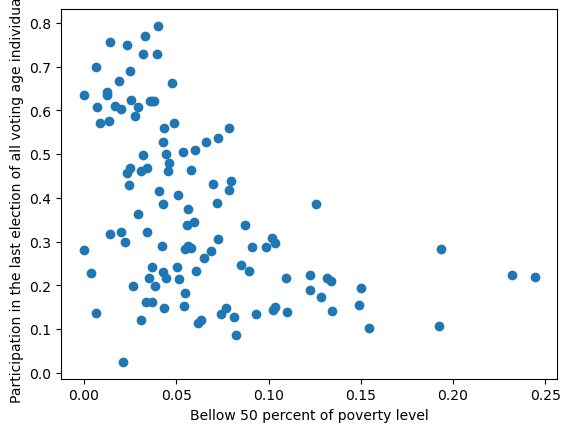

In [379]:
# Scatter plot
plt.scatter(full_df['Estimate!!Total!!Population for whom poverty status is determined!!ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS!!50 percent of poverty level']/full_df['Total population'], full_df['Participation in the last election of all voting age individuals'])
plt.xlabel('Bellow 50 percent of poverty level')
plt.ylabel('Participation in the last election of all voting age individuals')
plt.show()

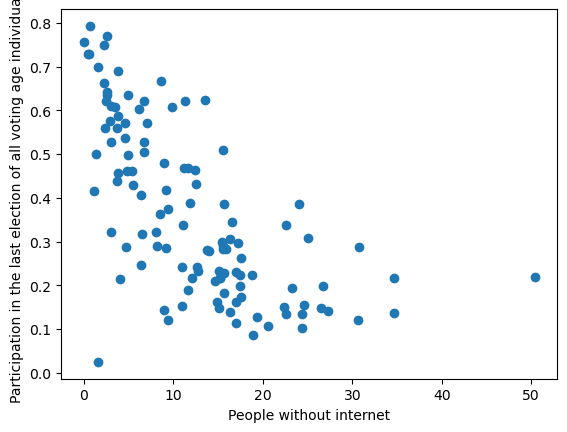

In [380]:
# Scatter plot
plt.scatter(full_df['Estimate!!Percent!!Total households!!TYPE OF INTERNET SUBSCRIPTIONS!!Without an Internet subscription'], full_df['Participation in the last election of all voting age individuals'])
plt.xlabel('People without internet')
plt.ylabel('Participation in the last election of all voting age individuals')
plt.show()

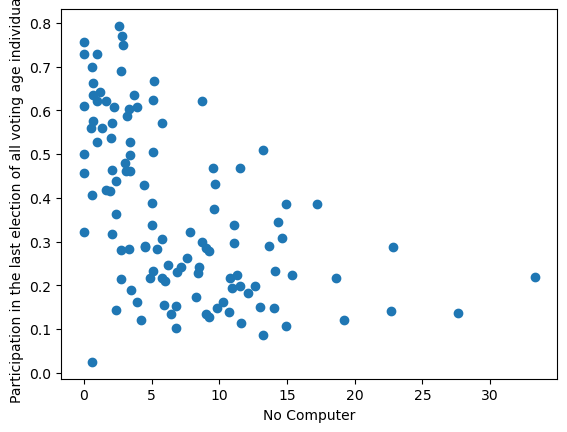

In [381]:
# Scatter plot
plt.scatter(full_df['Estimate!!Percent!!Total households!!TYPES OF COMPUTER!!No computer'], full_df['Participation in the last election of all voting age individuals'])
plt.xlabel('No Computer')
plt.ylabel('Participation in the last election of all voting age individuals')
plt.show()

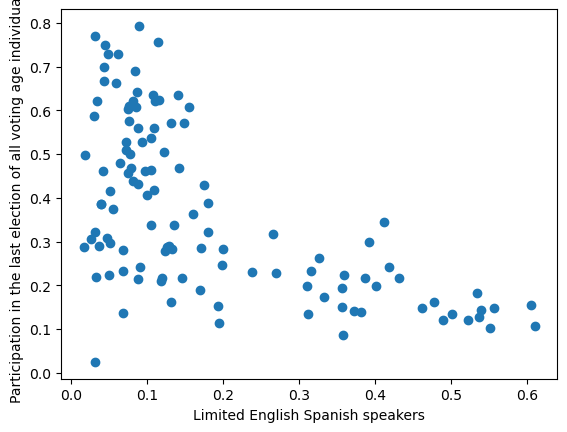

In [382]:
# Scatter plot
plt.scatter(full_df['Percent Limited English - Spanish'], full_df['Participation in the last election of all voting age individuals'])
plt.xlabel('Limited English Spanish speakers')
plt.ylabel('Participation in the last election of all voting age individuals')
plt.show()

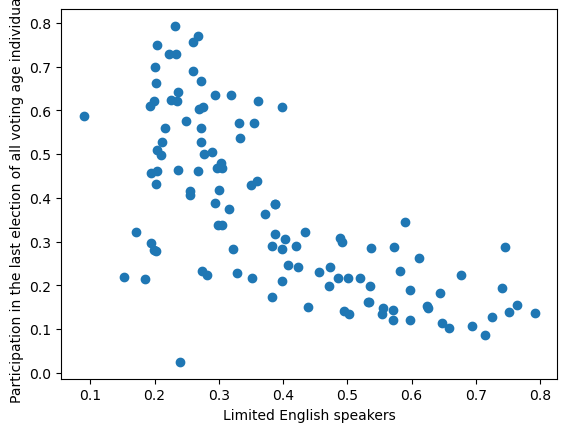

In [383]:
# Scatter plot
plt.scatter(full_df['Percent Limited English'], full_df['Participation in the last election of all voting age individuals'])
plt.xlabel('Limited English speakers')
plt.ylabel('Participation in the last election of all voting age individuals')
plt.show()

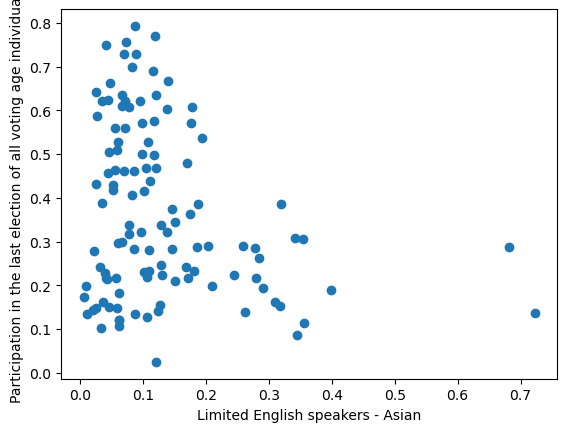

In [384]:
# Scatter plot
plt.scatter(full_df['Percent Limited English - Asian'], full_df['Participation in the last election of all voting age individuals'])
plt.xlabel('Limited English speakers - Asian')
plt.ylabel('Participation in the last election of all voting age individuals')
plt.show()

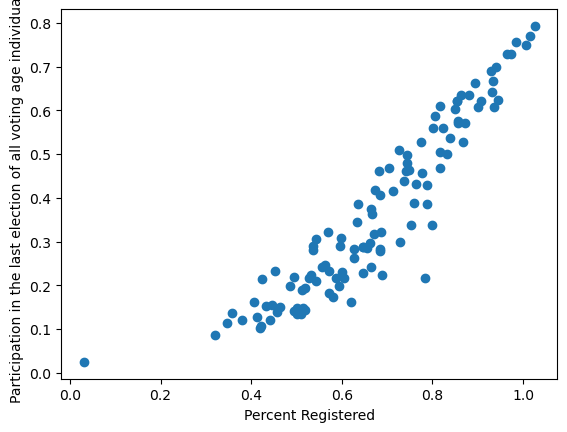

In [385]:
# Scatter plot
plt.scatter(full_df['Percent Registered'], full_df['Participation in the last election of all voting age individuals'])
plt.xlabel('Percent Registered')
plt.ylabel('Participation in the last election of all voting age individuals')
plt.show()

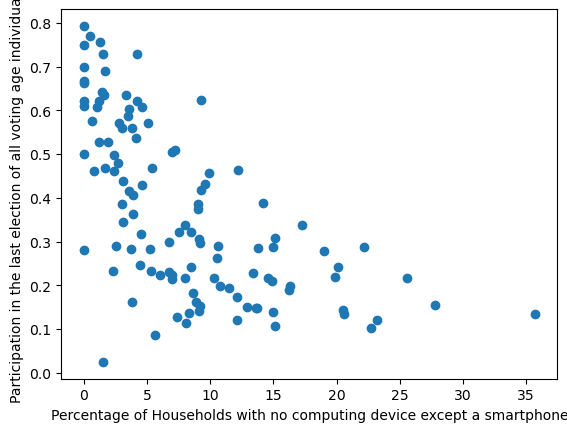

In [386]:
# Scatter plot
plt.scatter(full_df['Estimate!!Percent!!Total households!!TYPES OF COMPUTER!!Has one or more types of computing devices:!!Smartphone!!Smartphone with no other type of computing device'], full_df['Participation in the last election of all voting age individuals'])
plt.xlabel('Percentage of Households with no computing device except a smartphone')
plt.ylabel('Participation in the last election of all voting age individuals')
plt.show()

In [387]:
correlation_df = full_df.replace('(X)', np.nan)
correlation_df = correlation_df.replace('-', np.nan)
correlation_df = correlation_df.replace('**', np.nan)
correlation_df = correlation_df.replace('***', np.nan)
correlation_df = correlation_df.replace('*', np.nan)
correlation_df = correlation_df.replace('****', np.nan)
correlation_df = correlation_df.replace({'2,500-': 2500})
correlation_df = correlation_df.replace({'4,500+': 4500})
correlation_df = correlation_df.replace({'250,000+': 250000})
correlation_df = correlation_df.replace('N', np.nan)
correlation_df = correlation_df.replace({'4,000+': 4000})
correlation_df = correlation_df.replace({'3,500+': 3500})

correlation_matrix = correlation_df.corr()

In [388]:
correlation_matrix.to_csv('csv.csv')
correlation_matrix

,Unnamed: 0,tract,voter_count,median_age,average participation rate among registered voters,NA,A,N_x,V,Y,...,Percent below 400 percent of poverty level,Percent below 500 percent of poverty level,Percent White,Percent Black,Percent Native American,Percent Asian,Percent Hawaiian or Pacific Islander,Percent Some Other Race,Percent Hispanic or Latino (of any race),Percent non-White
Unnamed: 0,1.000000,0.218104,-0.041206,0.055844,-0.412401,-0.348796,-0.210852,0.327212,-0.280357,-0.079630,...,0.286849,0.307974,-0.520330,0.266799,0.499048,-0.217077,0.337191,0.579453,0.591278,0.488052
tract,0.218104,1.000000,-0.155834,-0.047558,0.047480,-0.094436,-0.106023,-0.149887,-0.169780,-0.144521,...,-0.128453,-0.150167,0.069843,-0.045582,-0.050439,0.010270,-0.044403,-0.046039,-0.047258,-0.058317
voter_count,-0.041206,-0.155834,1.000000,0.291947,0.370542,0.642183,0.893420,0.604252,0.867605,0.994833,...,-0.359697,-0.323434,0.310865,-0.083268,-0.135911,-0.238764,-0.133151,-0.164677,-0.143720,-0.333053
median_age,0.055844,-0.047558,0.291947,1.000000,0.573118,-0.193622,0.510540,-0.225001,0.064955,0.340149,...,-0.466053,-0.466391,0.419086,-0.272444,-0.365851,0.133290,-0.335449,-0.419170,-0.413687,-0.415896
average participation rate among registered voters,-0.412401,0.047480,0.370542,0.573118,1.000000,0.208332,0.708742,-0.452923,0.410026,0.446394,...,-0.874025,-0.863044,0.928510,-0.472557,-0.709847,0.006161,-0.554390,-0.806223,-0.781494,-0.926694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Percent Asian,-0.217077,0.010270,-0.238764,0.133290,0.006161,-0.027889,-0.155015,-0.253462,-0.222631,-0.209550,...,0.099667,0.079738,-0.112720,-0.337981,-0.203128,1.000000,-0.322809,-0.332550,-0.349877,0.170575
Percent Hawaiian or Pacific Islander,0.337191,-0.044403,-0.133151,-0.335449,-0.554390,-0.060969,-0.349629,0.331253,-0.156947,-0.182152,...,0.359828,0.336640,-0.493027,0.396556,0.379028,-0.322809,1.000000,0.544439,0.537744,0.477526
Percent Some Other Race,0.579453,-0.046039,-0.164677,-0.419170,-0.806223,-0.197901,-0.483557,0.519050,-0.308340,-0.232145,...,0.694415,0.683096,-0.750390,0.202728,0.864993,-0.332550,0.544439,1.000000,0.995533,0.722026
Percent Hispanic or Latino (of any race),0.591278,-0.047258,-0.143720,-0.413687,-0.781494,-0.185951,-0.460204,0.523896,-0.293163,-0.210049,...,0.671120,0.664745,-0.733878,0.187744,0.887406,-0.349877,0.537744,0.995533,1.000000,0.700890


In [389]:
threshold = 0.0
correlation=correlation_matrix['Participation in the last election of all voting age individuals']
weakly_correlated_columns = correlation[correlation.abs() < threshold].index
strong_df = full_df.drop(columns=weakly_correlated_columns)
strong_df

,Unnamed: 0,tract,voter_count,median_age,average participation rate among registered voters,NA,A,N_x,V,Y,...,Percent below 400 percent of poverty level,Percent below 500 percent of poverty level,Percent White,Percent Black,Percent Native American,Percent Asian,Percent Hawaiian or Pacific Islander,Percent Some Other Race,Percent Hispanic or Latino (of any race),Percent non-White
0,0,400100.0,2389,57.0,0.674641,43,1577,711,58,2178,...,0.201119,0.232719,0.615537,0.047400,0.000658,0.177090,0.003621,0.026333,0.067479,0.255102
1,1,400200.0,1477,52.0,0.724702,24,1049,360,44,1332,...,0.179910,0.209395,0.710145,0.019990,0.001499,0.103448,0.001999,0.020490,0.103448,0.147426
2,2,400300.0,3975,48.0,0.709157,103,2729,979,164,3597,...,0.258721,0.292696,0.620094,0.101926,0.004724,0.100654,0.004906,0.034702,0.099382,0.246911
3,3,400400.0,2796,45.0,0.720187,74,1958,639,125,2484,...,0.247568,0.299611,0.672422,0.070282,0.002918,0.097033,0.001946,0.029669,0.090953,0.201848
4,4,400500.0,2541,43.0,0.659926,49,1607,764,121,2192,...,0.484907,0.564490,0.537047,0.171515,0.006586,0.084248,0.001372,0.046103,0.119923,0.309824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,110,410300.0,1480,39.0,0.336566,32,373,1036,39,1173,...,0.802279,0.895937,0.062190,0.209613,0.028989,0.032458,0.022299,0.500248,0.697721,0.793608
111,111,410400.0,2335,47.0,0.450731,45,875,1332,83,1974,...,0.662240,0.750362,0.099952,0.320859,0.022936,0.110333,0.007484,0.293578,0.471994,0.755191
112,112,410500.0,1303,42.0,0.381278,35,367,845,56,984,...,0.771250,0.999608,0.188014,0.522914,0.007051,0.104975,0.009792,0.072072,0.131610,0.716804
113,113,426200.0,112,42.5,0.705300,2,86,20,4,102,...,0.169888,0.216887,0.625229,0.010580,0.000814,0.200610,0.001017,0.017091,0.076297,0.230112


In [390]:
# number of tracts to consider for high and low propensity
num_tracts = 29

# Sort the DataFrame by 'average_participation_rate' and get the top and bottom tracts
highest_propensity_tracts = strong_df.sort_values('Participation in the last election of all voting age individuals', ascending=False).head(num_tracts)
lowest_propensity_tracts = strong_df.sort_values('Participation in the last election of all voting age individuals', ascending=True).head(num_tracts)
highest_poverty_tracts = strong_df.sort_values('Percent below 500 percent of poverty level', ascending=False).head(num_tracts).describe(include='all')
lowest_poverty_tracts = strong_df.sort_values('Percent below 500 percent of poverty level', ascending=True).head(num_tracts).describe(include='all')
highest_asian_tracts = strong_df.sort_values('Percent Asian', ascending=False).head(num_tracts)
highest_white_tracts = strong_df.sort_values('Percent White', ascending=False).head(num_tracts)
highest_black_tracts = strong_df.sort_values('Percent Black', ascending=False).head(num_tracts)
highest_latino_tracts = strong_df.sort_values('Percent Hispanic or Latino (of any race)', ascending=False).head(num_tracts)
highest_nonwhite_tracts=strong_df.sort_values('Percent non-White', ascending=True).head(num_tracts).describe(include='all')
highest_median_income_tracts = strong_df.sort_values('Estimate!!Total!!MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!Population 25 years and over with earnings', ascending=False).head(num_tracts).describe(include='all')
lowest_median_income_tracts = strong_df.sort_values('Estimate!!Total!!MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!Population 25 years and over with earnings', ascending=True).head(num_tracts).describe(include='all')
highest_education_tracts = strong_df.sort_values("Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher", ascending=False).head(num_tracts).describe(include='all')
lowest_education_tracts = strong_df.sort_values("Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher", ascending=True).head(num_tracts).describe(include='all')
high_education_Asian = strong_df.sort_values("Estimate!!Percent!!RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT!!Asian alone!!Bachelor's degree or higher", ascending=False).head(num_tracts).describe(include='all')
high_education_Black = strong_df.sort_values("Estimate!!Percent!!RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT!!Black alone!!Bachelor's degree or higher", ascending=False).head(num_tracts).describe(include='all')
high_education_Latino = strong_df.sort_values("Estimate!!Percent!!RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT!!Hispanic or Latino Origin!!Bachelor's degree or higher", ascending=False).head(num_tracts).describe(include='all')
high_education_White = strong_df.sort_values("Estimate!!Percent!!RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT!!White alone, not Hispanic or Latino!!Bachelor's degree or higher", ascending=False).head(num_tracts).describe(include='all')

In [391]:
# number of tracts to consider for high and low propensity
num_tracts = 18

# Sort the DataFrame by 'average_participation_rate' and get the top and bottom tracts
highest_propensity_tracts_nw = strong_df[strong_df['Percent non-White'] > .50].sort_values('Participation in the last election of all voting age individuals', ascending=False).head(num_tracts).describe(include='all')
lowest_propensity_tracts_nw = strong_df[strong_df['Percent non-White'] > .50].sort_values('Participation in the last election of all voting age individuals', ascending=True).head(num_tracts).describe(include='all')
highest_poverty_tracts_nw = strong_df[strong_df['Percent non-White'] > .50].sort_values('Percent below 500 percent of poverty level', ascending=False).head(num_tracts).describe(include='all')
lowest_poverty_tracts_nw = strong_df[strong_df['Percent non-White'] > .50].sort_values('Percent below 500 percent of poverty level', ascending=True).head(num_tracts).describe(include='all')
highest_asian_tracts_nw = strong_df[strong_df['Percent non-White'] > .50].sort_values('Percent Asian', ascending=False).head(num_tracts).describe(include='all')
highest_white_tracts_nw = strong_df[strong_df['Percent non-White'] > .50].sort_values('Percent White', ascending=False).head(num_tracts).describe(include='all')
highest_black_tracts_nw = strong_df[strong_df['Percent non-White'] > .50].sort_values('Percent Black', ascending=False).head(num_tracts).describe(include='all')
highest_latino_tracts_nw = strong_df[strong_df['Percent non-White'] > .50].sort_values('Percent Hispanic or Latino (of any race)', ascending=False).head(num_tracts).describe(include='all')
highest_nonwhite_tracts_nw=strong_df[strong_df['Percent non-White'] > .50].sort_values('Percent non-White', ascending=True).head(num_tracts).describe(include='all')
highest_median_income_tracts_nw = strong_df[strong_df['Percent non-White'] > .50].sort_values('Estimate!!Total!!MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!Population 25 years and over with earnings', ascending=False).head(num_tracts).describe(include='all')
lowest_median_income_tracts_nw = strong_df[strong_df['Percent non-White'] > .50].sort_values('Estimate!!Total!!MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!Population 25 years and over with earnings', ascending=True).head(num_tracts).describe(include='all')
highest_education_tracts_nw = strong_df[strong_df['Percent non-White'] > .50].sort_values("Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher", ascending=False).head(num_tracts).describe(include='all')
lowest_education_tracts_nw = strong_df[strong_df['Percent non-White'] > .50].sort_values("Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher", ascending=True).head(num_tracts).describe(include='all')
high_education_Asian_nw = strong_df[strong_df['Percent non-White'] > .50].sort_values("Estimate!!Percent!!RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT!!Asian alone!!Bachelor's degree or higher", ascending=False).head(num_tracts).describe(include='all')
high_education_Black_nw = strong_df[strong_df['Percent non-White'] > .50].sort_values("Estimate!!Percent!!RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT!!Black alone!!Bachelor's degree or higher", ascending=False).head(num_tracts).describe(include='all')
high_education_Latino_nw = strong_df[strong_df['Percent non-White'] > .50].sort_values("Estimate!!Percent!!RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT!!Hispanic or Latino Origin!!Bachelor's degree or higher", ascending=False).head(num_tracts).describe(include='all')
high_education_White_nw = strong_df[strong_df['Percent non-White'] > .50].sort_values("Estimate!!Percent!!RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT!!White alone, not Hispanic or Latino!!Bachelor's degree or higher", ascending=False).head(num_tracts).describe(include='all')

In [392]:
summary_stats_high = highest_propensity_tracts.describe(include='all')
# Drop columns with missing value rate higher than threshold
threshold =7

# Drop columns with missing value count higher than threshold
summary_stats_filtered = summary_stats_high[summary_stats.columns[summary_stats_high.isnull().sum() < threshold]]
summary_stats_filtered = summary_stats_filtered.dropna()
cols_to_drop = [col for col in summary_stats_filtered.columns if 'Annotation' in col]
summary_stats_filtered = summary_stats_filtered.drop(cols_to_drop, axis=1)
cols_to_drop = [col for col in summary_stats_filtered.columns if 'Margin' in col]
summary_stats_high = summary_stats_filtered.drop(cols_to_drop, axis=1)
summary_stats_high.to_csv('csv0.csv')

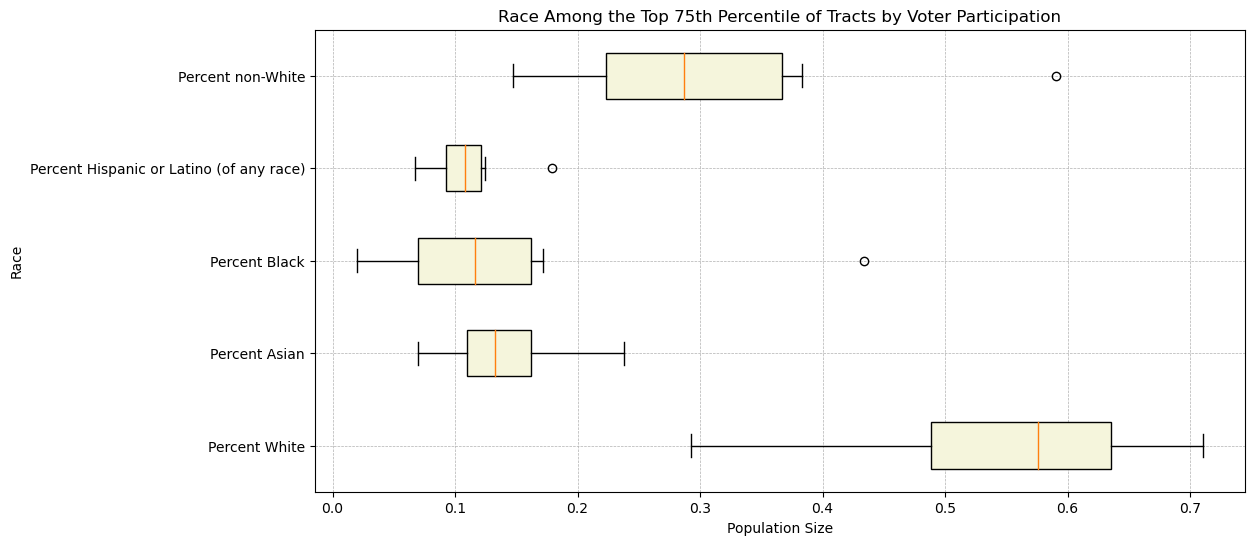

In [393]:
columns_for_boxplot = [
    'Percent White',
    'Percent Asian',
    'Percent Black',
    'Percent Hispanic or Latino (of any race)',
    'Percent non-White'
]
labels=[
    'Percent White',
    'Percent Asian',
    'Percent Black',
    'Percent Hispanic or Latino (of any race)',
    'Percent non-White'
]
boxplot_data = summary_stats_high.loc[['mean', '25%', '50%', '75%', 'min', 'max'], columns_for_boxplot]
# Transpose the data to have variables as rows and statistics as columns
boxplot_data = boxplot_data.T
plt.figure(figsize=(12, 6))
boxplot = plt.boxplot(boxplot_data.values.T, vert=False, labels=labels, patch_artist=True, boxprops=dict(facecolor='beige'))
plt.xlabel('Population Size')
plt.ylabel('Race')
plt.title('Race Among the Top 75th Percentile of Tracts by Voter Participation')
plt.grid(True, axis='both', linestyle='--', linewidth=0.5)
plt.show()

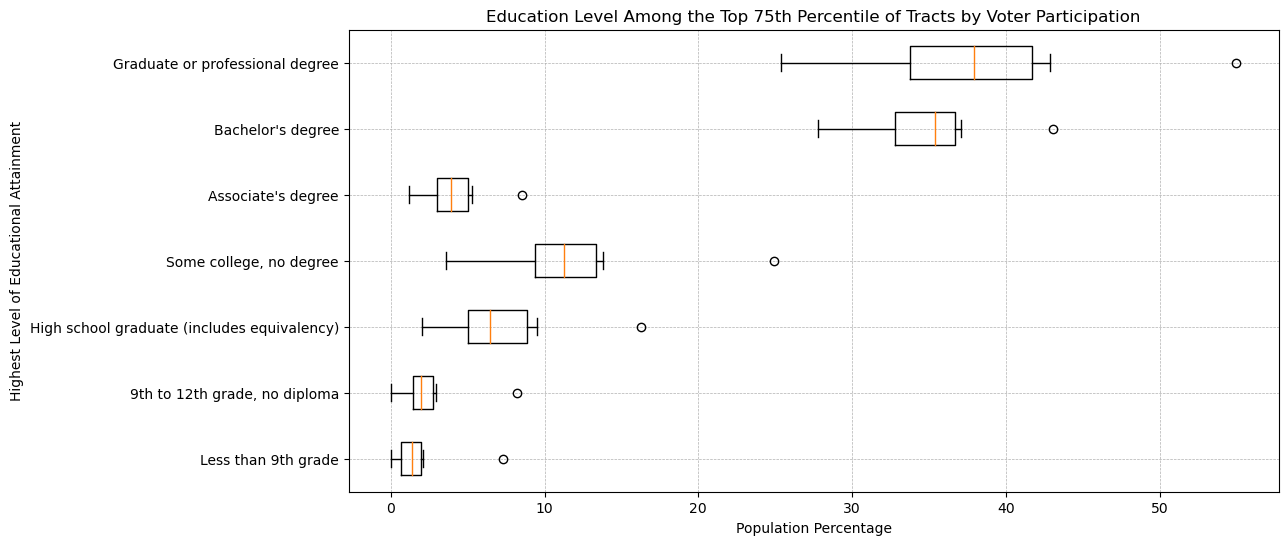

In [394]:
columns_for_boxplot2=[
"Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade",
'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma',
'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)',
"Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree",
"Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree",
"Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree",
"Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree",
]
labels=[
    'Less than 9th grade',
    '9th to 12th grade, no diploma',
    'High school graduate (includes equivalency)',
    'Some college, no degree',
    "Associate's degree",
    "Bachelor's degree",
    "Graduate or professional degree",
]
# Select the relevant rows for the columns to include in the boxplots
boxplot_data = summary_stats_high.loc[['mean', '25%', '50%', '75%', 'min', 'max'], columns_for_boxplot2]

# Transpose the data to have variables as rows and statistics as columns
boxplot_data = boxplot_data.T

# Create a boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(boxplot_data.values.T, vert=False, labels=labels)
plt.xlabel('Population Percentage')
plt.ylabel('Highest Level of Educational Attainment')
plt.title('Education Level Among the Top 75th Percentile of Tracts by Voter Participation')
plt.grid(True, axis='both', linestyle='--', linewidth=0.5)
plt.show()

In [395]:
summary_stats_low = lowest_propensity_tracts.describe(include='all')
# Drop columns with missing value rate higher than threshold
threshold =7

# Drop columns with missing value count higher than threshold
summary_stats_filtered = summary_stats[summary_stats_low.columns[summary_stats_low.isnull().sum() < threshold]]
summary_stats_filtered = summary_stats_filtered.dropna()
cols_to_drop = [col for col in summary_stats_filtered.columns if 'Annotation' in col]
summary_stats_filtered = summary_stats_filtered.drop(cols_to_drop, axis=1)
cols_to_drop = [col for col in summary_stats_filtered.columns if 'Margin' in col]
summary_stats_low = summary_stats_filtered.drop(cols_to_drop, axis=1)
summary_stats_low.to_csv('csv1.csv')

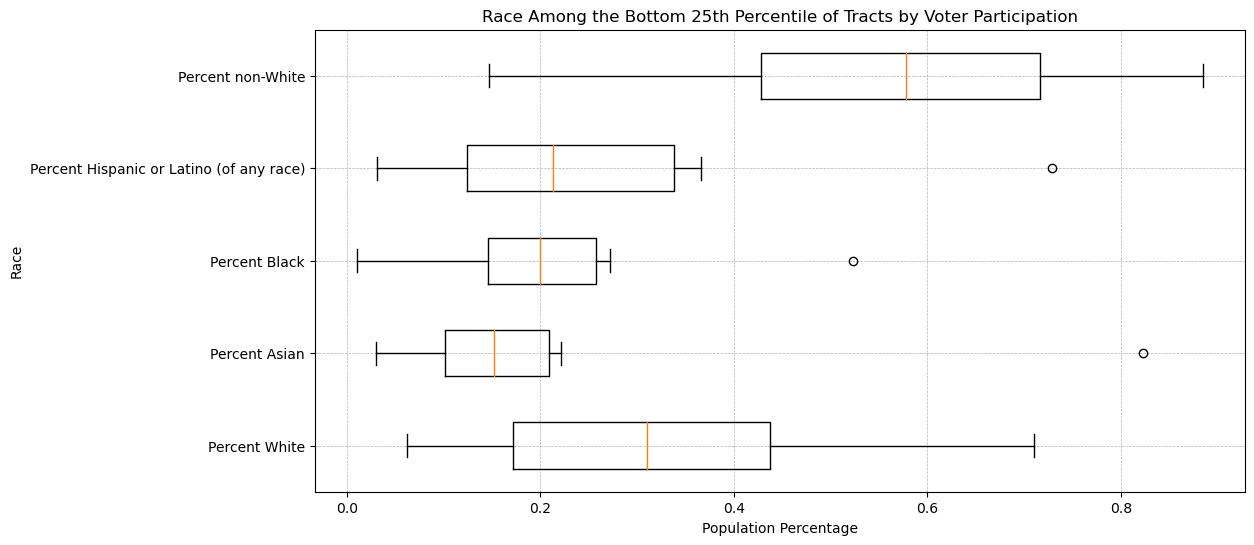

In [396]:
# List the columns for which to create boxplots
columns_for_boxplot = [
'Percent White',
'Percent Asian',
'Percent Black',
'Percent Hispanic or Latino (of any race)',
'Percent non-White'
]
# Select the relevant rows (statistics) for the columns to include in the boxplots
boxplot_data = summary_stats_low.loc[['mean', '25%', '50%', '75%', 'min', 'max'], columns_for_boxplot]

# Transpose the data to have variables as rows and statistics as columns
boxplot_data = boxplot_data.T

# Create a boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(boxplot_data.values.T, vert=False, labels=boxplot_data.index)
plt.xlabel('Population Percentage')
plt.ylabel('Race')
plt.title('Race Among the Bottom 25th Percentile of Tracts by Voter Participation')
plt.grid(True, axis='both', linestyle='--', linewidth=0.5)
plt.show()

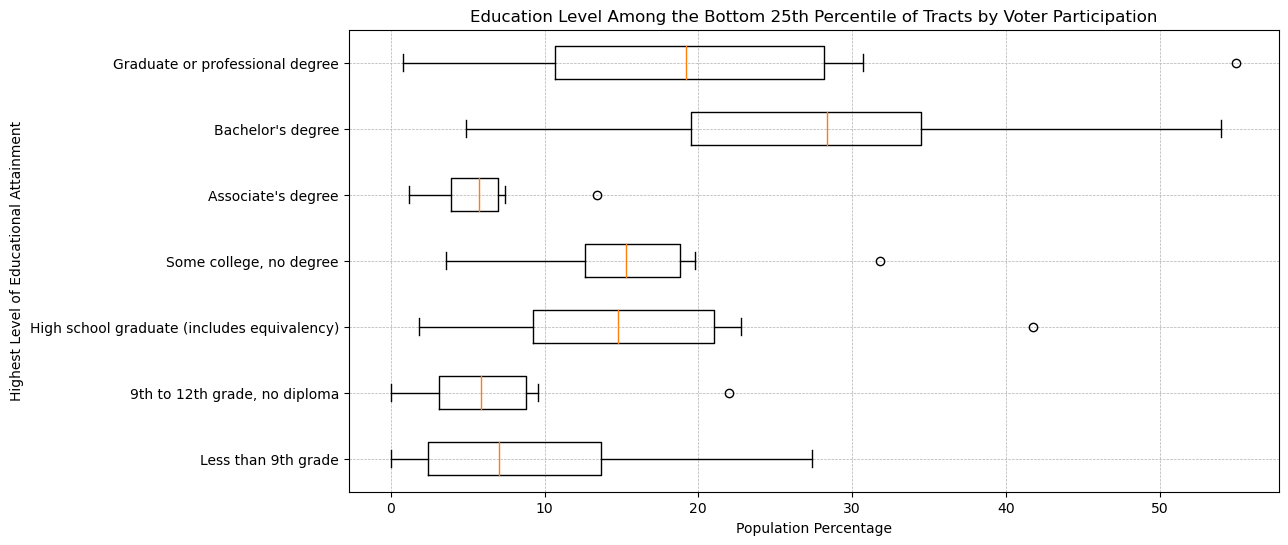

In [397]:
columns_for_boxplot2=[
"Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade",
'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma',
'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)',
"Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree",
"Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree",
"Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree",
"Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree",
]
labels=[
    'Less than 9th grade',
    '9th to 12th grade, no diploma',
    'High school graduate (includes equivalency)',
    'Some college, no degree',
    "Associate's degree",
    "Bachelor's degree",
    "Graduate or professional degree",
]
# Select the relevant rows (statistics) for the columns to include in the boxplots
boxplot_data = summary_stats_low.loc[['mean', '25%', '50%', '75%', 'min', 'max'], columns_for_boxplot2]

# Transpose the data to have variables as rows and statistics as columns
boxplot_data = boxplot_data.T

# Create a boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(boxplot_data.values.T, vert=False, labels=labels)
plt.xlabel('Population Percentage')
plt.ylabel('Highest Level of Educational Attainment')
plt.title('Education Level Among the Bottom 25th Percentile of Tracts by Voter Participation')
plt.grid(True, axis='both', linestyle='--', linewidth=0.5)
plt.show()

In [398]:
highest_asian_tracts_sum=highest_asian_tracts.describe(include='all')
highest_black_tracts_sum=highest_black_tracts.describe(include='all')
highest_latino_tracts_sum=highest_latino_tracts.describe(include='all')
highest_white_tracts_sum=highest_white_tracts.describe(include='all')

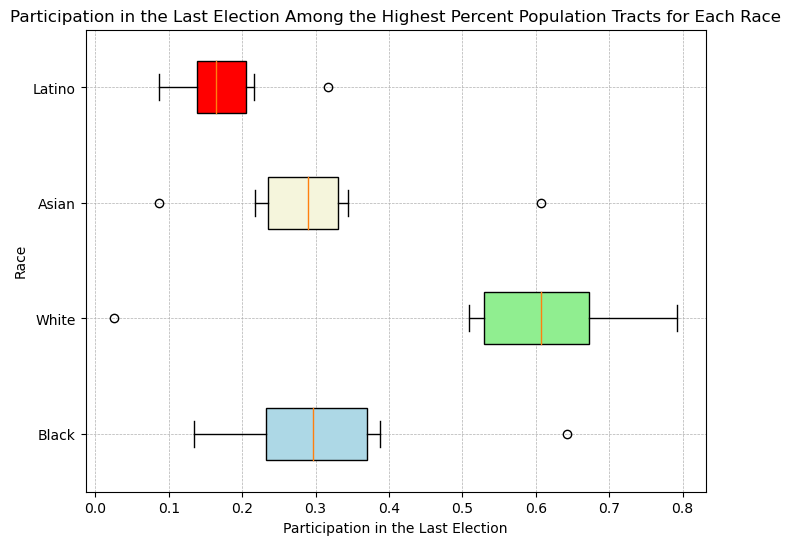

In [399]:
plt.figure(figsize=(8, 6))
boxplot_data = [
    highest_black_tracts_sum.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Participation in the last election of all voting age individuals'],
    highest_white_tracts_sum.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Participation in the last election of all voting age individuals'],
    highest_asian_tracts_sum.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Participation in the last election of all voting age individuals'],
    highest_latino_tracts_sum.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Participation in the last election of all voting age individuals']
]
box_colors = ['lightblue', 'lightgreen','beige','red']
boxplot = plt.boxplot(boxplot_data, vert=False, patch_artist=True, labels=['Black', 'White', 'Asian', 'Latino'])

for box, color in zip(boxplot['boxes'], box_colors):
    box.set(facecolor=color)
plt.ylabel('Race')
plt.xlabel('Participation in the Last Election')
plt.title('Participation in the Last Election Among the Highest Percent Population Tracts for Each Race')
plt.grid(True, axis='both', linestyle='--', linewidth=0.5)
plt.show()

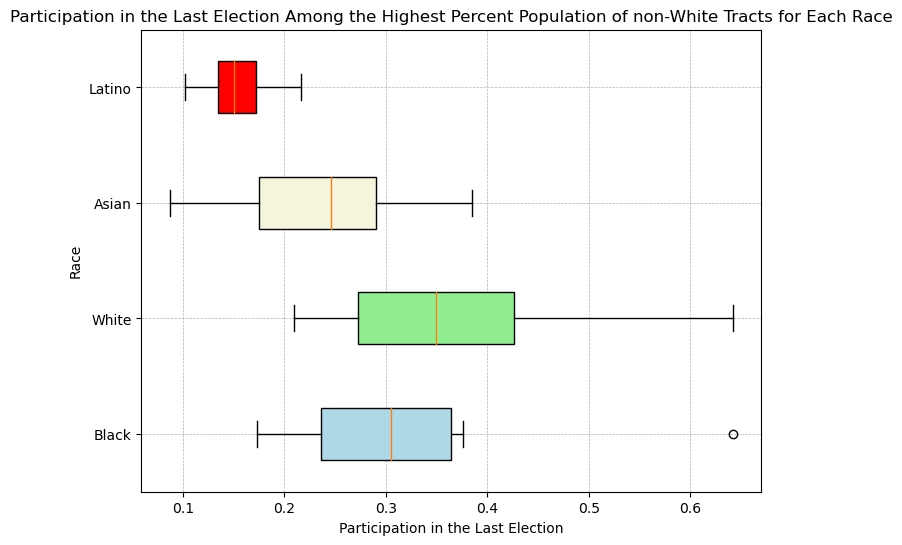

In [400]:
plt.figure(figsize=(8, 6))
boxplot_data = [
    highest_black_tracts_nw.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Participation in the last election of all voting age individuals'],
    highest_white_tracts_nw.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Participation in the last election of all voting age individuals'],
    highest_asian_tracts_nw.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Participation in the last election of all voting age individuals'],
    highest_latino_tracts_nw.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Participation in the last election of all voting age individuals']
]
box_colors = ['lightblue', 'lightgreen','beige','red']
boxplot = plt.boxplot(boxplot_data, vert=False, patch_artist=True, labels=['Black', 'White', 'Asian', 'Latino'])

for box, color in zip(boxplot['boxes'], box_colors):
    box.set(facecolor=color)
plt.ylabel('Race')
plt.xlabel('Participation in the Last Election')
plt.title('Participation in the Last Election Among the Highest Percent Population of non-White Tracts for Each Race')
plt.grid(True, axis='both', linestyle='--', linewidth=0.5)
plt.show()

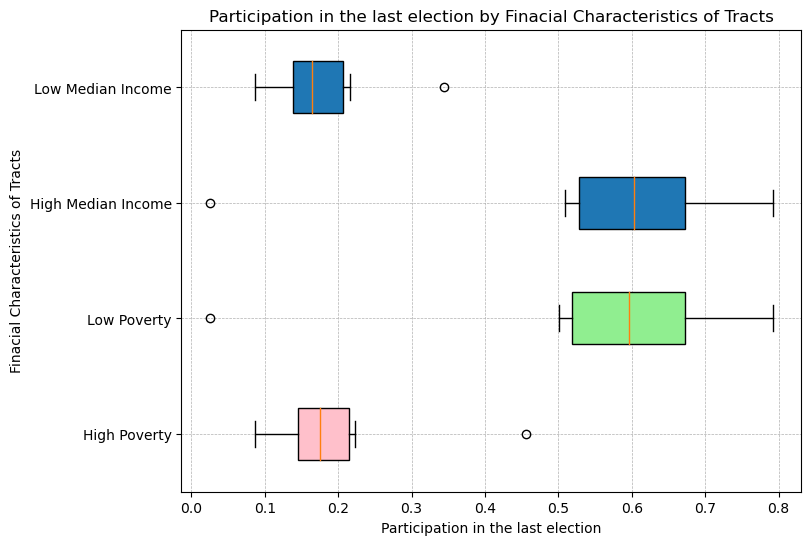

In [401]:
plt.figure(figsize=(8, 6))
boxplot_data = [
    highest_poverty_tracts.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Participation in the last election of all voting age individuals'],
    lowest_poverty_tracts.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Participation in the last election of all voting age individuals'],
    highest_median_income_tracts.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Participation in the last election of all voting age individuals'],
    lowest_median_income_tracts.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Participation in the last election of all voting age individuals'],
]
box_colors = ['pink', 'lightgreen']
boxplot = plt.boxplot(boxplot_data, vert=False, patch_artist=True, labels=['High Poverty', 'Low Poverty','High Median Income','Low Median Income'])

for box, color in zip(boxplot['boxes'], box_colors):
    box.set(facecolor=color)
plt.ylabel('Finacial Characteristics of Tracts')
plt.xlabel('Participation in the last election')
plt.title('Participation in the last election by Finacial Characteristics of Tracts')
plt.grid(True, axis='both', linestyle='--', linewidth=0.5)
plt.show()

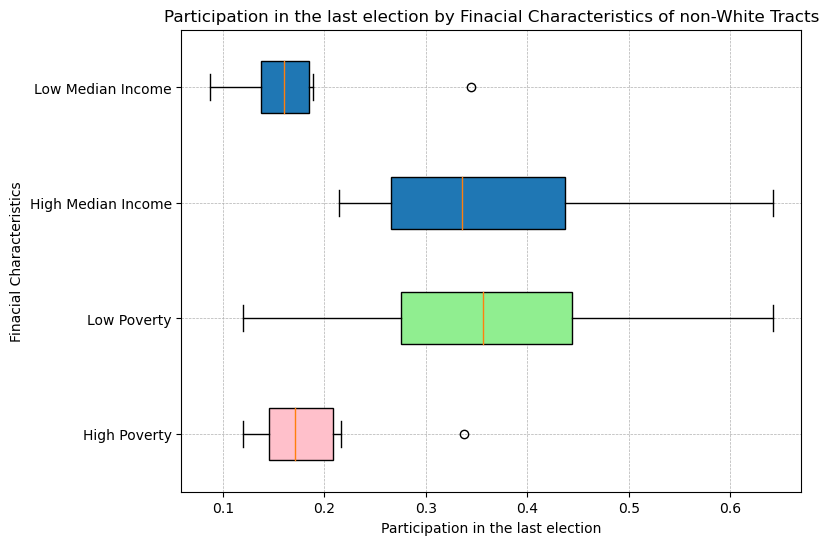

In [402]:
plt.figure(figsize=(8, 6))
boxplot_data = [
    highest_poverty_tracts_nw.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Participation in the last election of all voting age individuals'],
    lowest_poverty_tracts_nw.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Participation in the last election of all voting age individuals'],
    highest_median_income_tracts_nw.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Participation in the last election of all voting age individuals'],
    lowest_median_income_tracts_nw.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Participation in the last election of all voting age individuals'],
]
box_colors = ['pink', 'lightgreen']
boxplot = plt.boxplot(boxplot_data, vert=False, patch_artist=True, labels=['High Poverty', 'Low Poverty','High Median Income','Low Median Income'])

for box, color in zip(boxplot['boxes'], box_colors):
    box.set(facecolor=color)
plt.ylabel('Finacial Characteristics')
plt.xlabel('Participation in the last election')
plt.title('Participation in the last election by Finacial Characteristics of non-White Tracts')
plt.grid(True, axis='both', linestyle='--', linewidth=0.5)
plt.show()

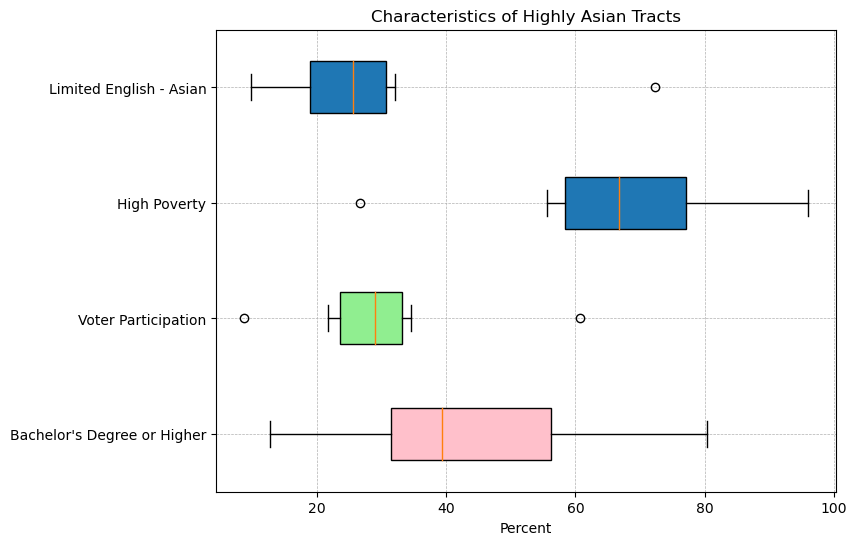

In [403]:
plt.figure(figsize=(8, 6))
boxplot_data = [
    highest_asian_tracts_sum.loc[['mean', '25%', '50%', '75%', 'min', 'max'],"Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher"],
    highest_asian_tracts_sum.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Participation in the last election of all voting age individuals']*100,
    highest_asian_tracts_sum.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Percent below 500 percent of poverty level']*100,
    highest_asian_tracts_sum.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Percent Limited English - Asian']*100,
]
box_colors = ['pink', 'lightgreen']
boxplot = plt.boxplot(boxplot_data, vert=False, patch_artist=True, labels=["Bachelor's Degree or Higher", 'Voter Participation','High Poverty','Limited English - Asian'])

for box, color in zip(boxplot['boxes'], box_colors):
    box.set(facecolor=color)

plt.xlabel('Percent')
plt.title('Characteristics of Highly Asian Tracts')
plt.grid(True, axis='both', linestyle='--', linewidth=0.5)
plt.show()

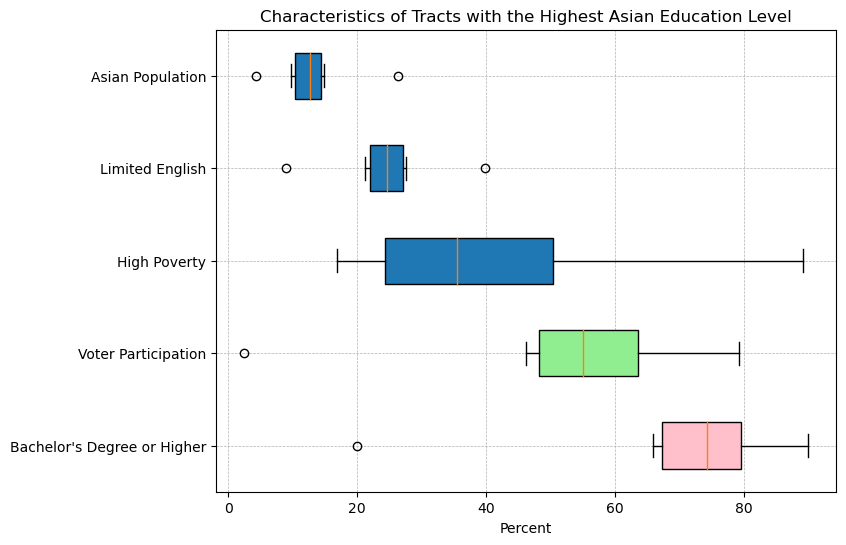

In [404]:
plt.figure(figsize=(8, 6))
boxplot_data = [
    high_education_Asian.loc[['mean', '25%', '50%', '75%', 'min', 'max'],"Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher"],
    high_education_Asian.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Participation in the last election of all voting age individuals']*100,
    high_education_Asian.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Percent below 500 percent of poverty level']*100,
    high_education_Asian.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Percent Limited English']*100,
    high_education_Asian.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Percent Asian']*100,
]
box_colors = ['pink', 'lightgreen']
boxplot = plt.boxplot(boxplot_data, vert=False, patch_artist=True, labels=["Bachelor's Degree or Higher", 'Voter Participation','High Poverty','Limited English','Asian Population'])

for box, color in zip(boxplot['boxes'], box_colors):
    box.set(facecolor=color)

plt.xlabel('Percent')
plt.title('Characteristics of Tracts with the Highest Asian Education Level')
plt.grid(True, axis='both', linestyle='--', linewidth=0.5)
plt.show()

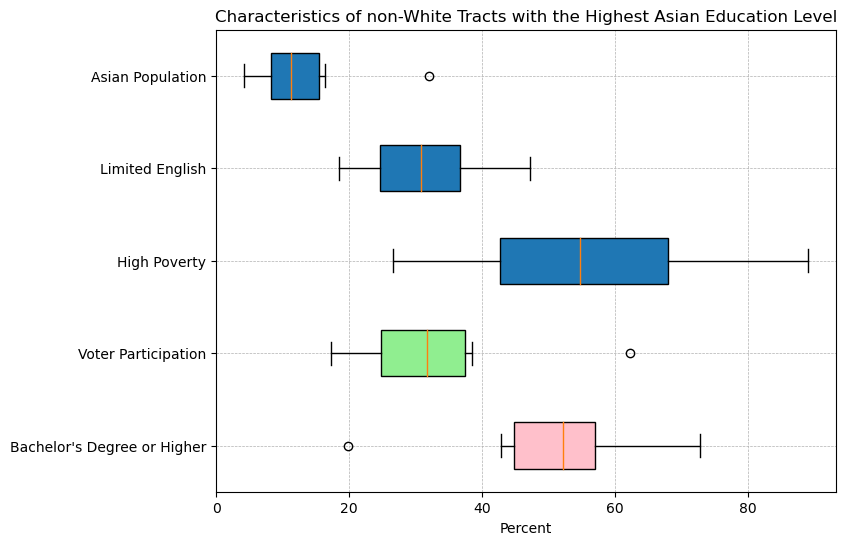

In [405]:
plt.figure(figsize=(8, 6))
boxplot_data = [
    high_education_Asian_nw.loc[['mean', '25%', '50%', '75%', 'min', 'max'],"Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher"],
    high_education_Asian_nw.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Participation in the last election of all voting age individuals']*100,
    high_education_Asian_nw.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Percent below 500 percent of poverty level']*100,
    high_education_Asian_nw.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Percent Limited English']*100,
    high_education_Asian_nw.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Percent Asian']*100,
]
box_colors = ['pink', 'lightgreen']
boxplot = plt.boxplot(boxplot_data, vert=False, patch_artist=True, labels=["Bachelor's Degree or Higher", 'Voter Participation','High Poverty','Limited English','Asian Population'])

for box, color in zip(boxplot['boxes'], box_colors):
    box.set(facecolor=color)

plt.xlabel('Percent')
plt.title('Characteristics of non-White Tracts with the Highest Asian Education Level')
plt.grid(True, axis='both', linestyle='--', linewidth=0.5)
plt.show()

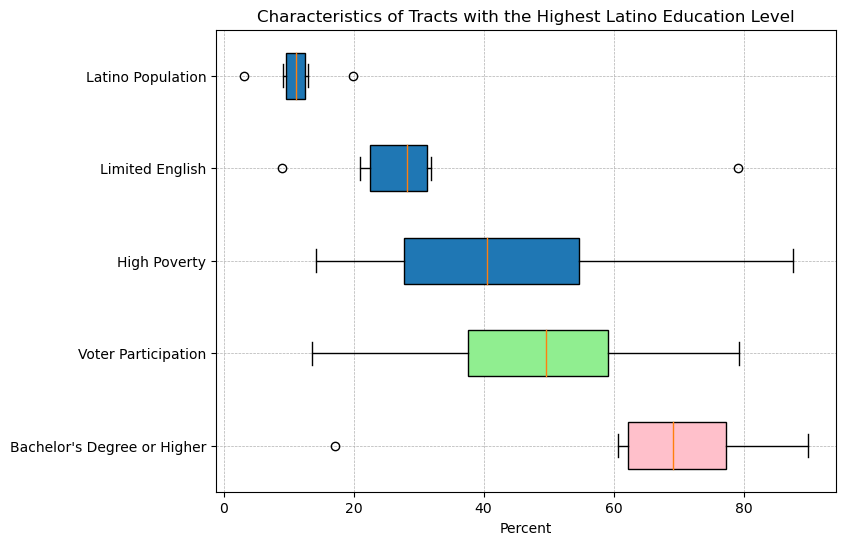

In [406]:
plt.figure(figsize=(8, 6))
boxplot_data = [
    high_education_Latino.loc[['mean', '25%', '50%', '75%', 'min', 'max'],"Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher"],
    high_education_Latino.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Participation in the last election of all voting age individuals']*100,
    high_education_Latino.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Percent below 500 percent of poverty level']*100,
    high_education_Latino.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Percent Limited English']*100,
    high_education_Latino.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Percent Hispanic or Latino (of any race)']*100,
]
box_colors = ['pink', 'lightgreen']
boxplot = plt.boxplot(boxplot_data, vert=False, patch_artist=True, labels=["Bachelor's Degree or Higher", 'Voter Participation','High Poverty','Limited English','Latino Population'])

for box, color in zip(boxplot['boxes'], box_colors):
    box.set(facecolor=color)

plt.xlabel('Percent')
plt.title('Characteristics of Tracts with the Highest Latino Education Level')
plt.grid(True, axis='both', linestyle='--', linewidth=0.5)
plt.show()

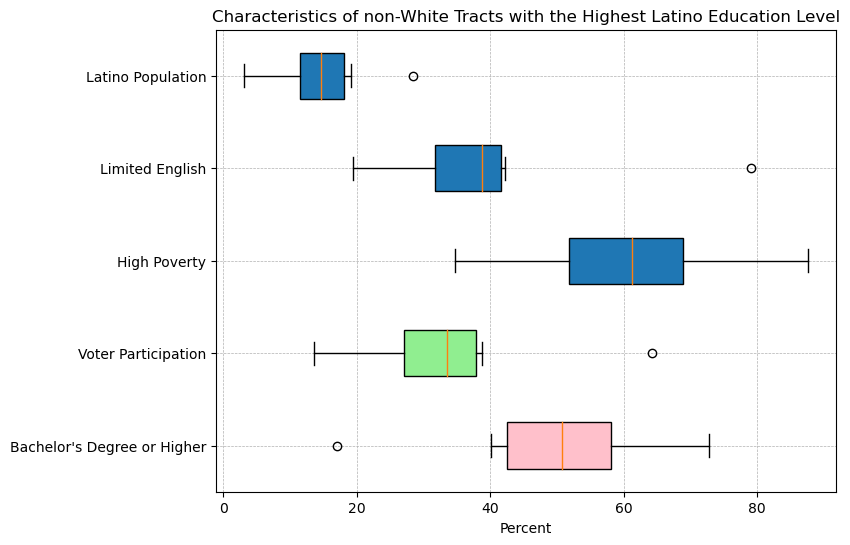

In [407]:
plt.figure(figsize=(8, 6))
boxplot_data = [
    high_education_Latino_nw.loc[['mean', '25%', '50%', '75%', 'min', 'max'],"Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher"],
    high_education_Latino_nw.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Participation in the last election of all voting age individuals']*100,
    high_education_Latino_nw.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Percent below 500 percent of poverty level']*100,
    high_education_Latino_nw.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Percent Limited English']*100,
    high_education_Latino_nw.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Percent Hispanic or Latino (of any race)']*100,
]
box_colors = ['pink', 'lightgreen']
boxplot = plt.boxplot(boxplot_data, vert=False, patch_artist=True, labels=["Bachelor's Degree or Higher", 'Voter Participation','High Poverty','Limited English','Latino Population'])

for box, color in zip(boxplot['boxes'], box_colors):
    box.set(facecolor=color)

plt.xlabel('Percent')
plt.title('Characteristics of non-White Tracts with the Highest Latino Education Level')
plt.grid(True, axis='both', linestyle='--', linewidth=0.5)
plt.show()

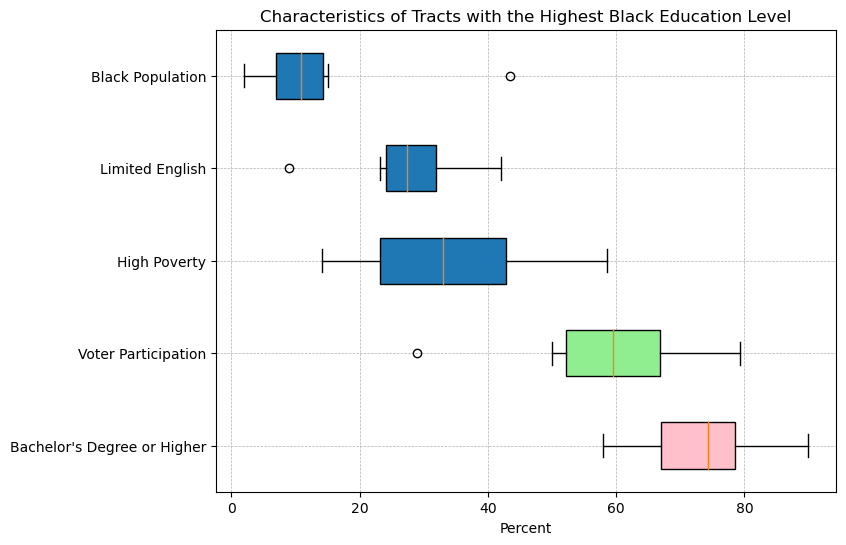

In [408]:
plt.figure(figsize=(8, 6))
boxplot_data = [
    high_education_Black.loc[['mean', '25%', '50%', '75%', 'min', 'max'],"Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher"],
    high_education_Black.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Participation in the last election of all voting age individuals']*100,
    high_education_Black.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Percent below 500 percent of poverty level']*100,
    high_education_Black.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Percent Limited English']*100,
    high_education_Black.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Percent Black']*100,
]
box_colors = ['pink', 'lightgreen']
boxplot = plt.boxplot(boxplot_data, vert=False, patch_artist=True, labels=["Bachelor's Degree or Higher", 'Voter Participation','High Poverty','Limited English','Black Population'])

for box, color in zip(boxplot['boxes'], box_colors):
    box.set(facecolor=color)

plt.xlabel('Percent')
plt.title('Characteristics of Tracts with the Highest Black Education Level')
plt.grid(True, axis='both', linestyle='--', linewidth=0.5)
plt.show()

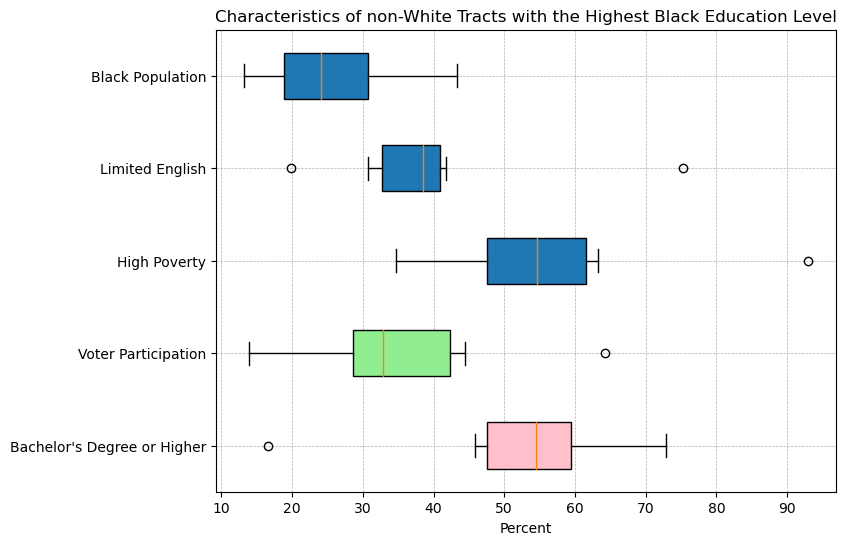

In [409]:
plt.figure(figsize=(8, 6))
boxplot_data = [
    high_education_Black_nw.loc[['mean', '25%', '50%', '75%', 'min', 'max'],"Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher"],
    high_education_Black_nw.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Participation in the last election of all voting age individuals']*100,
    high_education_Black_nw.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Percent below 500 percent of poverty level']*100,
    high_education_Black_nw.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Percent Limited English']*100,
    high_education_Black_nw.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Percent Black']*100,
]
box_colors = ['pink', 'lightgreen']
boxplot = plt.boxplot(boxplot_data, vert=False, patch_artist=True, labels=["Bachelor's Degree or Higher", 'Voter Participation','High Poverty','Limited English','Black Population'])

for box, color in zip(boxplot['boxes'], box_colors):
    box.set(facecolor=color)

plt.xlabel('Percent')
plt.title('Characteristics of non-White Tracts with the Highest Black Education Level')
plt.grid(True, axis='both', linestyle='--', linewidth=0.5)
plt.show()

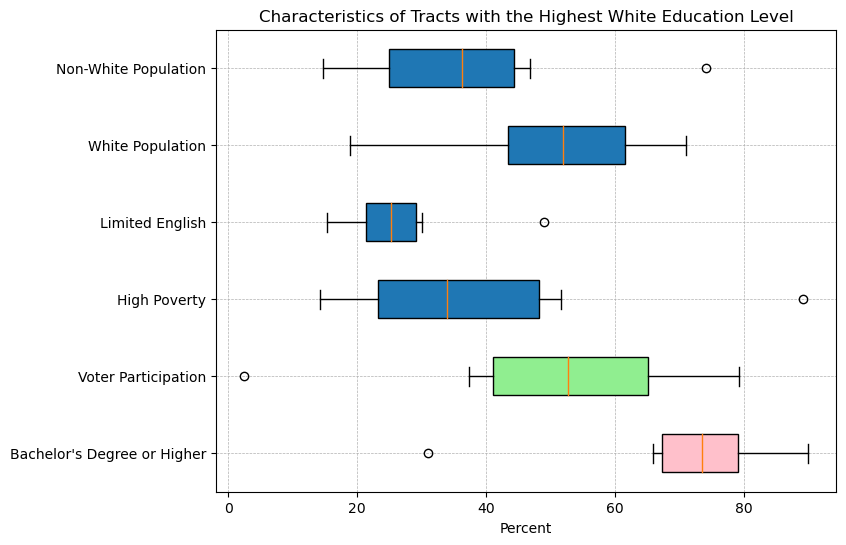

In [410]:
plt.figure(figsize=(8, 6))
boxplot_data = [
    high_education_White.loc[['mean', '25%', '50%', '75%', 'min', 'max'],"Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher"],
    high_education_White.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Participation in the last election of all voting age individuals']*100,
    high_education_White.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Percent below 500 percent of poverty level']*100,
    high_education_White.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Percent Limited English']*100,
    high_education_White.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Percent White']*100,
    high_education_White.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Percent non-White']*100,
]
box_colors = ['pink', 'lightgreen']
boxplot = plt.boxplot(boxplot_data, vert=False, patch_artist=True, labels=["Bachelor's Degree or Higher", 'Voter Participation','High Poverty','Limited English','White Population','Non-White Population'])

for box, color in zip(boxplot['boxes'], box_colors):
    box.set(facecolor=color)

plt.xlabel('Percent')
plt.title('Characteristics of Tracts with the Highest White Education Level')
plt.grid(True, axis='both', linestyle='--', linewidth=0.5)
plt.show()

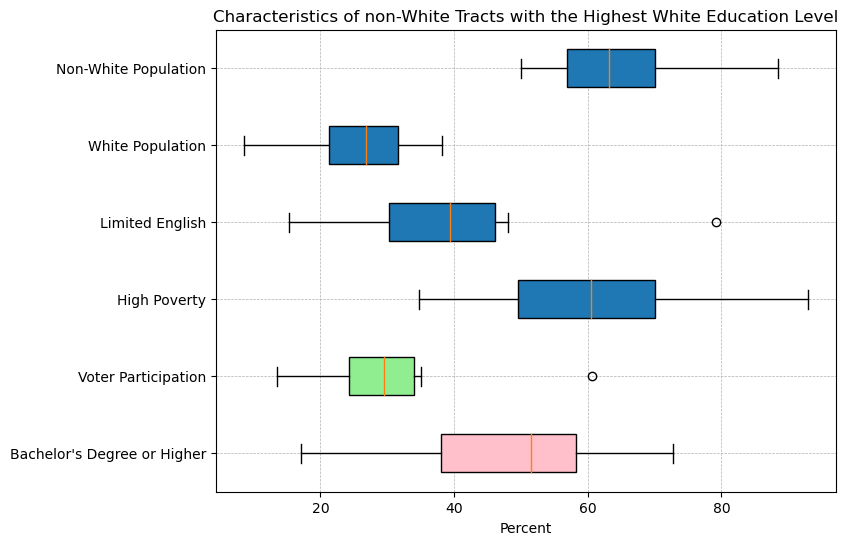

In [411]:
plt.figure(figsize=(8, 6))
boxplot_data = [
    high_education_White_nw.loc[['mean', '25%', '50%', '75%', 'min', 'max'],"Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher"],
    high_education_White_nw.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Participation in the last election of all voting age individuals']*100,
    high_education_White_nw.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Percent below 500 percent of poverty level']*100,
    high_education_White_nw.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Percent Limited English']*100,
    high_education_White_nw.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Percent White']*100,
    high_education_White_nw.loc[['mean', '25%', '50%', '75%', 'min', 'max'],'Percent non-White']*100,
]
box_colors = ['pink', 'lightgreen']
boxplot = plt.boxplot(boxplot_data, vert=False, patch_artist=True, labels=["Bachelor's Degree or Higher", 'Voter Participation','High Poverty','Limited English','White Population','Non-White Population'])

for box, color in zip(boxplot['boxes'], box_colors):
    box.set(facecolor=color)

plt.xlabel('Percent')
plt.title('Characteristics of non-White Tracts with the Highest White Education Level')
plt.grid(True, axis='both', linestyle='--', linewidth=0.5)
plt.show()

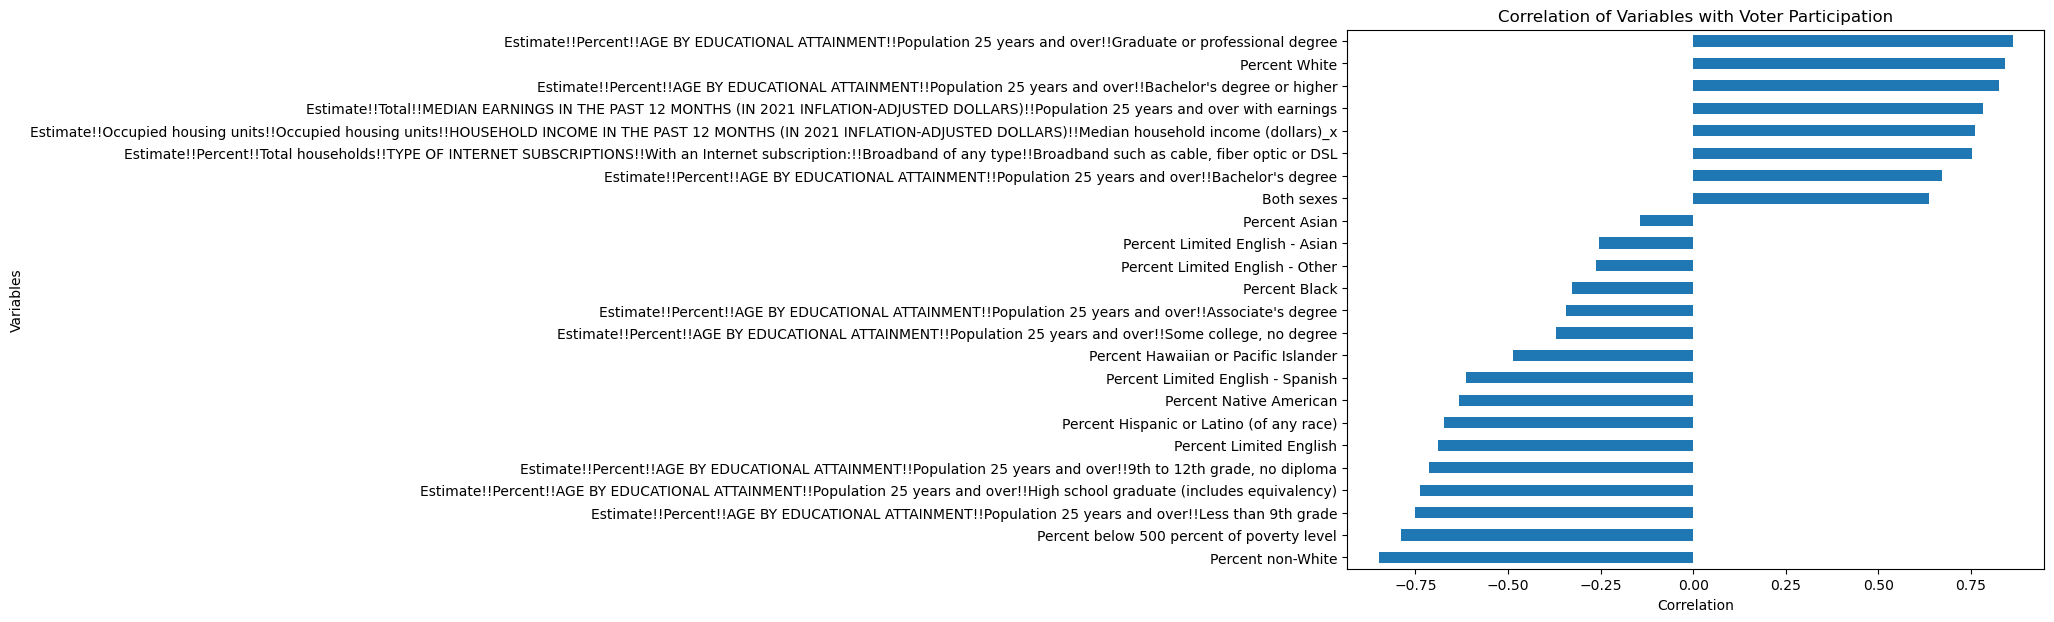

In [436]:
subset_cols = [
    'Percent below 500 percent of poverty level',
    'Estimate!!Total!!MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!Population 25 years and over with earnings',
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher",
    'Estimate!!Occupied housing units!!Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)_x',
    'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade',
    'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma',
    'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)',
    'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree',
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree",
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree",
    'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree',
    'Percent Limited English',
    'Percent Limited English - Spanish',
    'Percent Limited English - Other',
    'Percent Limited English - Asian',
    'Estimate!!Percent!!Total households!!TYPE OF INTERNET SUBSCRIPTIONS!!With an Internet subscription:!!Broadband of any type!!Broadband such as cable, fiber optic or DSL',
    'Percent Asian',
    'Percent White',
    'Percent Black',
    'Percent Native American',
    'Percent Hawaiian or Pacific Islander',
    'Percent Hispanic or Latino (of any race)',
    'Percent non-White',
    'Both sexes',
]
# Filter correlation matrix for voter_participation column
correlation_voter_participation = correlation_matrix['Participation in the last election of all voting age individuals']
correlation_voter_participation = correlation_voter_participation[subset_cols]
# Plotting
correlation_voter_participation.sort_values().plot(kind='barh', figsize=(9,7))
plt.title('Correlation of Variables with Voter Participation')
plt.xlabel('Correlation')
plt.ylabel('Variables')
plt.show()

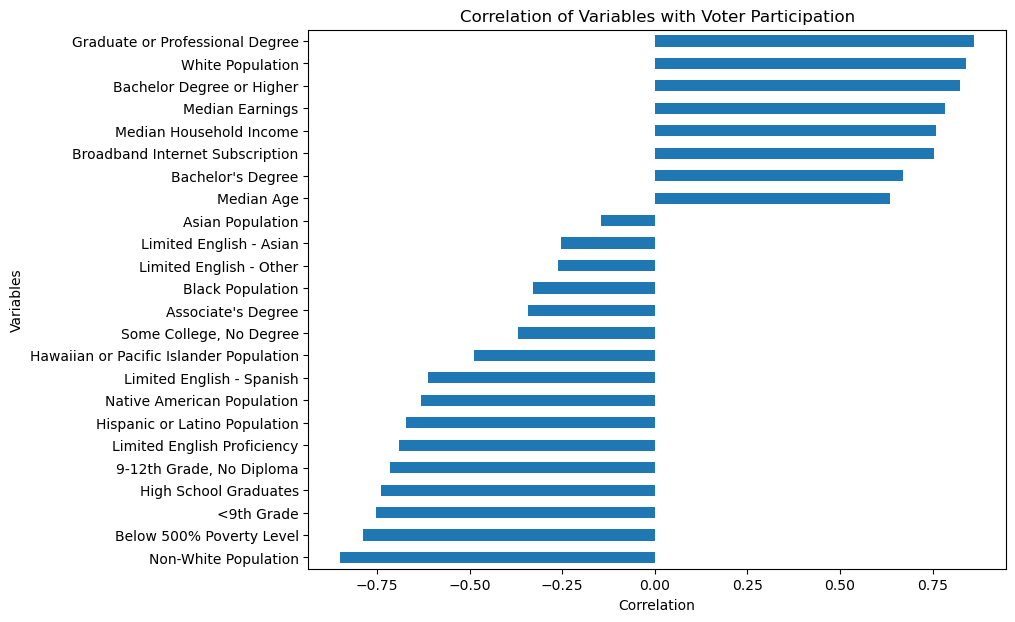

<Figure size 640x480 with 0 Axes>

In [449]:
#dictionary for renaming columns
rename_dict = {
    'Percent below 500 percent of poverty level': 'Below 500% Poverty Level',
    'Estimate!!Total!!MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!Population 25 years and over with earnings': 'Median Earnings',
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher": 'Bachelor Degree or Higher',
    'Estimate!!Occupied housing units!!Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)_x': 'Median Household Income',
    'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade': '<9th Grade',
    'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma': '9-12th Grade, No Diploma',
    'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)': 'High School Graduates',
    'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree': 'Some College, No Degree',
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree": "Associate's Degree",
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree": "Bachelor's Degree",
    'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree': 'Graduate or Professional Degree',
    'Percent Limited English': 'Limited English Proficiency',
    'Percent Limited English - Spanish': 'Limited English - Spanish',
    'Percent Limited English - Other': 'Limited English - Other',
    'Percent Limited English - Asian': 'Limited English - Asian',
    'Estimate!!Percent!!Total households!!TYPE OF INTERNET SUBSCRIPTIONS!!With an Internet subscription:!!Broadband of any type!!Broadband such as cable, fiber optic or DSL': 'Broadband Internet Subscription',
    'Percent Asian': 'Asian Population',
    'Percent White': 'White Population',
    'Percent Black': 'Black Population',
    'Percent Native American': 'Native American Population',
    'Percent Hawaiian or Pacific Islander': 'Hawaiian or Pacific Islander Population',
    'Percent Hispanic or Latino (of any race)': 'Hispanic or Latino Population',
    'Percent non-White': 'Non-White Population',
    'Both sexes': 'Median Age',
}
# Filter correlation matrix for voter_participation column
correlation_voter_participation = correlation_matrix['Participation in the last election of all voting age individuals']
correlation_voter_participation = correlation_voter_participation[subset_cols]
# Rename the columns
correlation_voter_participation = correlation_voter_participation.rename(index=rename_dict)

correlation_voter_participation.sort_values().plot(kind='barh', figsize=(9,7))
plt.title('Correlation of Variables with Voter Participation')
plt.xlabel('Correlation')
plt.ylabel('Variables')
plt.show()
plt.savefig('Participation Correlation.png', dpi=300, bbox_inches='tight')

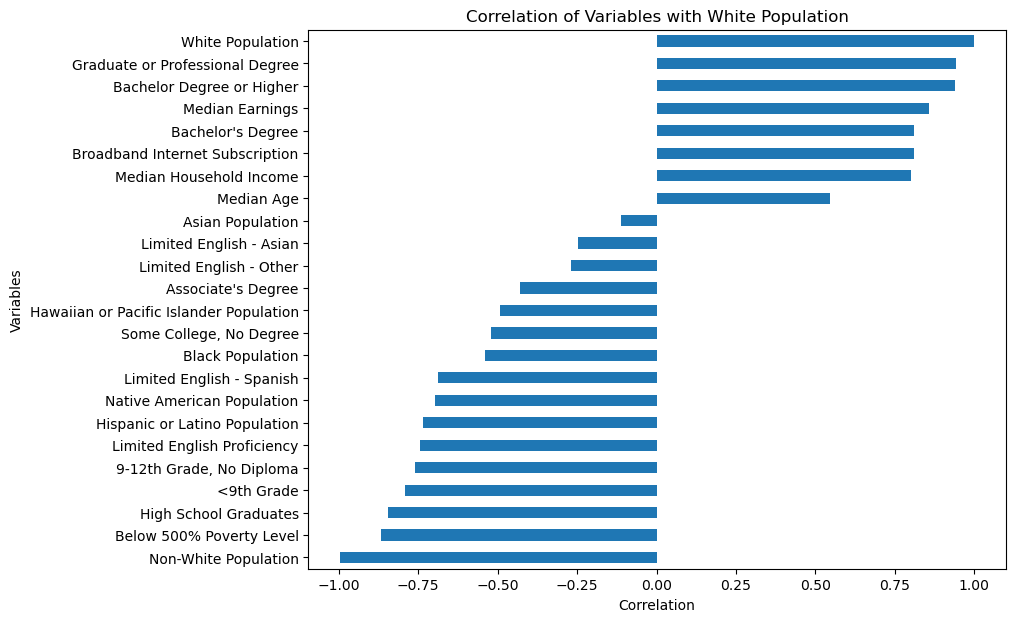

<Figure size 640x480 with 0 Axes>

In [450]:
#dictionary for renaming columns
rename_dict = {
    'Percent below 500 percent of poverty level': 'Below 500% Poverty Level',
    'Estimate!!Total!!MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!Population 25 years and over with earnings': 'Median Earnings',
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher": 'Bachelor Degree or Higher',
    'Estimate!!Occupied housing units!!Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)_x': 'Median Household Income',
    'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade': '<9th Grade',
    'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma': '9-12th Grade, No Diploma',
    'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)': 'High School Graduates',
    'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree': 'Some College, No Degree',
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree": "Associate's Degree",
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree": "Bachelor's Degree",
    'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree': 'Graduate or Professional Degree',
    'Percent Limited English': 'Limited English Proficiency',
    'Percent Limited English - Spanish': 'Limited English - Spanish',
    'Percent Limited English - Other': 'Limited English - Other',
    'Percent Limited English - Asian': 'Limited English - Asian',
    'Estimate!!Percent!!Total households!!TYPE OF INTERNET SUBSCRIPTIONS!!With an Internet subscription:!!Broadband of any type!!Broadband such as cable, fiber optic or DSL': 'Broadband Internet Subscription',
    'Percent Asian': 'Asian Population',
    'Percent White': 'White Population',
    'Percent Black': 'Black Population',
    'Percent Native American': 'Native American Population',
    'Percent Hawaiian or Pacific Islander': 'Hawaiian or Pacific Islander Population',
    'Percent Hispanic or Latino (of any race)': 'Hispanic or Latino Population',
    'Percent non-White': 'Non-White Population',
    'Both sexes': 'Median Age',
}
# Filter correlation matrix for voter_participation column
correlation_voter_participation = correlation_matrix['Percent White']
correlation_voter_participation = correlation_voter_participation[subset_cols]
# Rename the columns
correlation_voter_participation = correlation_voter_participation.rename(index=rename_dict)

correlation_voter_participation.sort_values().plot(kind='barh', figsize=(9,7))
plt.title('Correlation of Variables with White Population')
plt.xlabel('Correlation')
plt.ylabel('Variables')
plt.show()
plt.savefig('White Correlation.png', dpi=300, bbox_inches='tight')

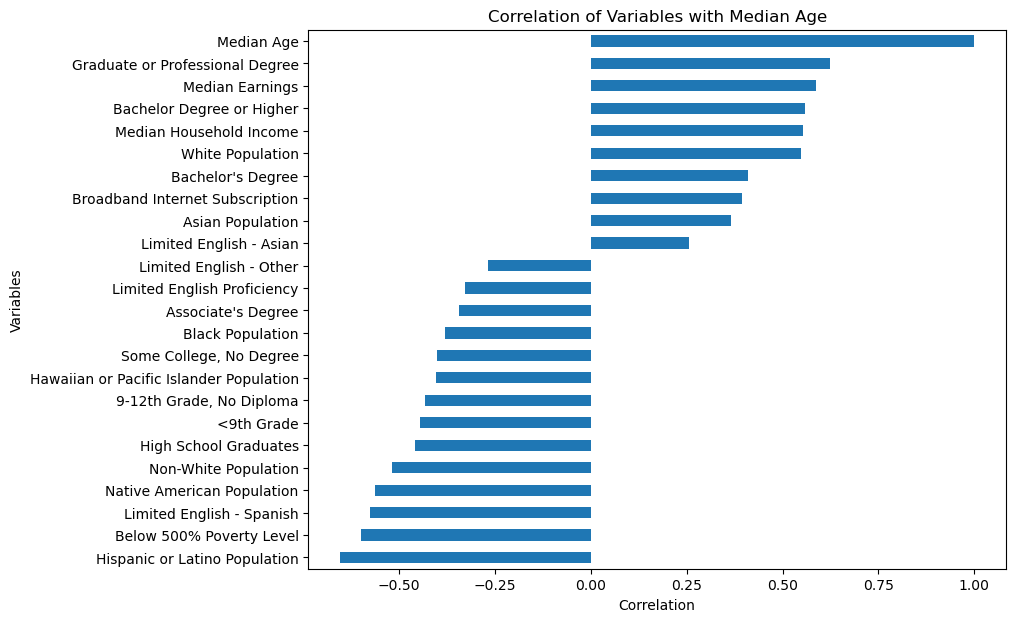

<Figure size 640x480 with 0 Axes>

In [451]:
#dictionary for renaming columns
rename_dict = {
    'Percent below 500 percent of poverty level': 'Below 500% Poverty Level',
    'Estimate!!Total!!MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!Population 25 years and over with earnings': 'Median Earnings',
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher": 'Bachelor Degree or Higher',
    'Estimate!!Occupied housing units!!Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)_x': 'Median Household Income',
    'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade': '<9th Grade',
    'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma': '9-12th Grade, No Diploma',
    'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)': 'High School Graduates',
    'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree': 'Some College, No Degree',
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree": "Associate's Degree",
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree": "Bachelor's Degree",
    'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree': 'Graduate or Professional Degree',
    'Percent Limited English': 'Limited English Proficiency',
    'Percent Limited English - Spanish': 'Limited English - Spanish',
    'Percent Limited English - Other': 'Limited English - Other',
    'Percent Limited English - Asian': 'Limited English - Asian',
    'Estimate!!Percent!!Total households!!TYPE OF INTERNET SUBSCRIPTIONS!!With an Internet subscription:!!Broadband of any type!!Broadband such as cable, fiber optic or DSL': 'Broadband Internet Subscription',
    'Percent Asian': 'Asian Population',
    'Percent White': 'White Population',
    'Percent Black': 'Black Population',
    'Percent Native American': 'Native American Population',
    'Percent Hawaiian or Pacific Islander': 'Hawaiian or Pacific Islander Population',
    'Percent Hispanic or Latino (of any race)': 'Hispanic or Latino Population',
    'Percent non-White': 'Non-White Population',
    'Both sexes': 'Median Age',
}
# Filter correlation matrix for voter_participation column
correlation_voter_participation = correlation_matrix['Both sexes']
correlation_voter_participation = correlation_voter_participation[subset_cols]
# Rename the columns
correlation_voter_participation = correlation_voter_participation.rename(index=rename_dict)

correlation_voter_participation.sort_values().plot(kind='barh', figsize=(9,7))
plt.title('Correlation of Variables with Median Age')
plt.xlabel('Correlation')
plt.ylabel('Variables')
plt.show()
plt.savefig('Correlation of Variables with Median Age.png', dpi=300, bbox_inches='tight')

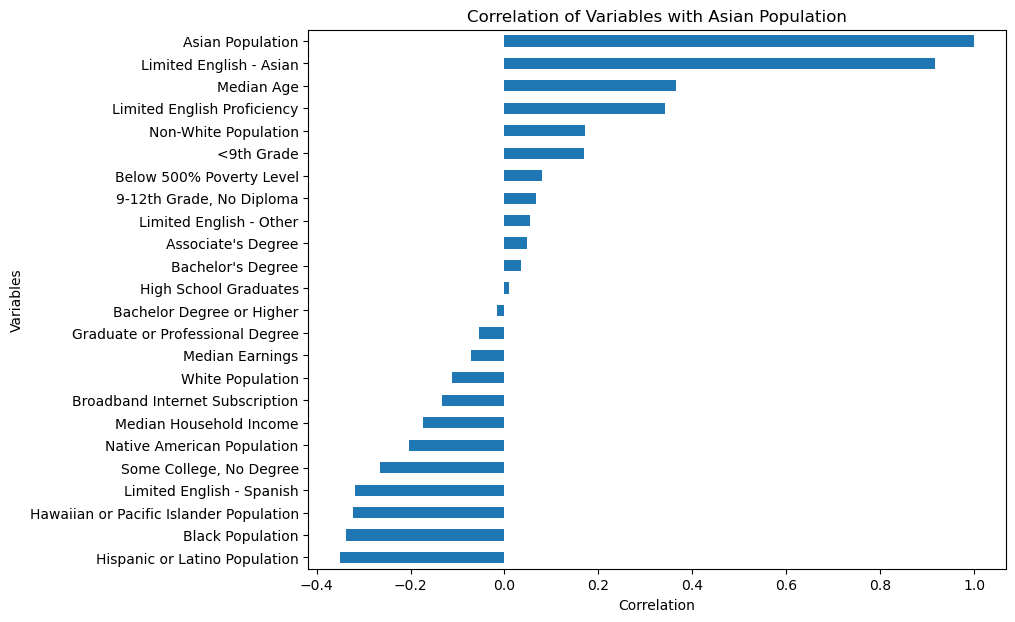

<Figure size 640x480 with 0 Axes>

In [452]:
#dictionary for renaming columns
rename_dict = {
    'Percent below 500 percent of poverty level': 'Below 500% Poverty Level',
    'Estimate!!Total!!MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!Population 25 years and over with earnings': 'Median Earnings',
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher": 'Bachelor Degree or Higher',
    'Estimate!!Occupied housing units!!Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)_x': 'Median Household Income',
    'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade': '<9th Grade',
    'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma': '9-12th Grade, No Diploma',
    'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)': 'High School Graduates',
    'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree': 'Some College, No Degree',
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree": "Associate's Degree",
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree": "Bachelor's Degree",
    'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree': 'Graduate or Professional Degree',
    'Percent Limited English': 'Limited English Proficiency',
    'Percent Limited English - Spanish': 'Limited English - Spanish',
    'Percent Limited English - Other': 'Limited English - Other',
    'Percent Limited English - Asian': 'Limited English - Asian',
    'Estimate!!Percent!!Total households!!TYPE OF INTERNET SUBSCRIPTIONS!!With an Internet subscription:!!Broadband of any type!!Broadband such as cable, fiber optic or DSL': 'Broadband Internet Subscription',
    'Percent Asian': 'Asian Population',
    'Percent White': 'White Population',
    'Percent Black': 'Black Population',
    'Percent Native American': 'Native American Population',
    'Percent Hawaiian or Pacific Islander': 'Hawaiian or Pacific Islander Population',
    'Percent Hispanic or Latino (of any race)': 'Hispanic or Latino Population',
    'Percent non-White': 'Non-White Population',
    'Both sexes': 'Median Age',
}
# Filter correlation matrix for voter_participation column
correlation_voter_participation = correlation_matrix['Percent Asian']
correlation_voter_participation = correlation_voter_participation[subset_cols]
# Rename the columns
correlation_voter_participation = correlation_voter_participation.rename(index=rename_dict)

correlation_voter_participation.sort_values().plot(kind='barh', figsize=(9,7))
plt.title('Correlation of Variables with Asian Population')
plt.xlabel('Correlation')
plt.ylabel('Variables')
plt.show()
plt.savefig('Correlation of Variables with Asian Population.png', dpi=300, bbox_inches='tight')

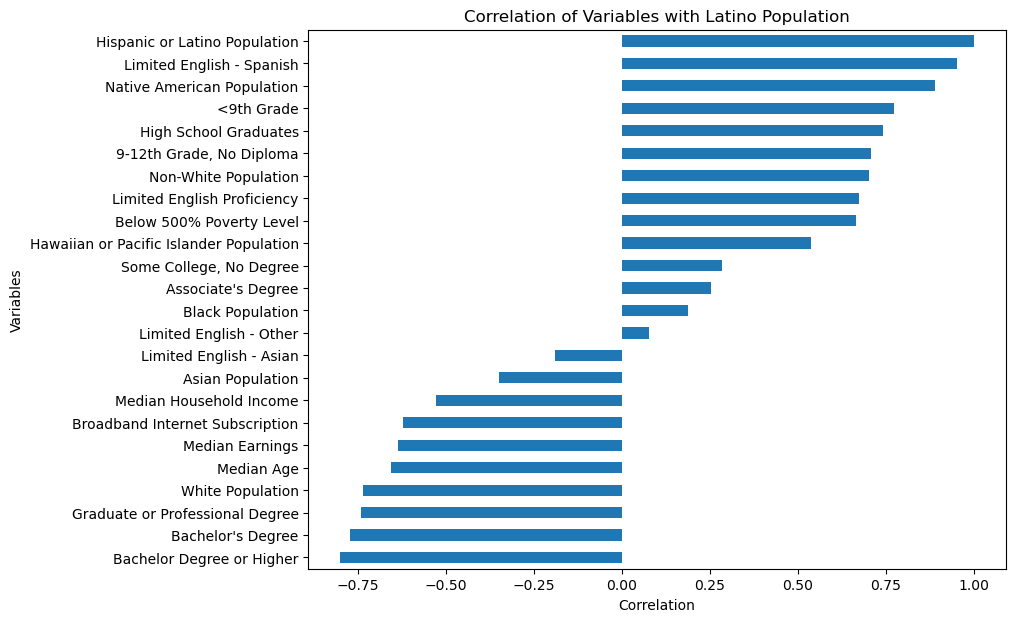

<Figure size 640x480 with 0 Axes>

In [453]:
#dictionary for renaming columns
rename_dict = {
    'Percent below 500 percent of poverty level': 'Below 500% Poverty Level',
    'Estimate!!Total!!MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!Population 25 years and over with earnings': 'Median Earnings',
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher": 'Bachelor Degree or Higher',
    'Estimate!!Occupied housing units!!Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)_x': 'Median Household Income',
    'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade': '<9th Grade',
    'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma': '9-12th Grade, No Diploma',
    'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)': 'High School Graduates',
    'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree': 'Some College, No Degree',
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree": "Associate's Degree",
    "Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree": "Bachelor's Degree",
    'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree': 'Graduate or Professional Degree',
    'Percent Limited English': 'Limited English Proficiency',
    'Percent Limited English - Spanish': 'Limited English - Spanish',
    'Percent Limited English - Other': 'Limited English - Other',
    'Percent Limited English - Asian': 'Limited English - Asian',
    'Estimate!!Percent!!Total households!!TYPE OF INTERNET SUBSCRIPTIONS!!With an Internet subscription:!!Broadband of any type!!Broadband such as cable, fiber optic or DSL': 'Broadband Internet Subscription',
    'Percent Asian': 'Asian Population',
    'Percent White': 'White Population',
    'Percent Black': 'Black Population',
    'Percent Native American': 'Native American Population',
    'Percent Hawaiian or Pacific Islander': 'Hawaiian or Pacific Islander Population',
    'Percent Hispanic or Latino (of any race)': 'Hispanic or Latino Population',
    'Percent non-White': 'Non-White Population',
    'Both sexes': 'Median Age',
}
# Filter correlation matrix for voter_participation column
correlation_voter_participation = correlation_matrix['Percent Hispanic or Latino (of any race)']
correlation_voter_participation = correlation_voter_participation[subset_cols]
# Rename the columns
correlation_voter_participation = correlation_voter_participation.rename(index=rename_dict)

correlation_voter_participation.sort_values().plot(kind='barh', figsize=(9,7))
plt.title('Correlation of Variables with Latino Population')
plt.xlabel('Correlation')
plt.ylabel('Variables')
plt.show()
plt.savefig('Correlation of Variables with Latino Population.png', dpi=300, bbox_inches='tight')

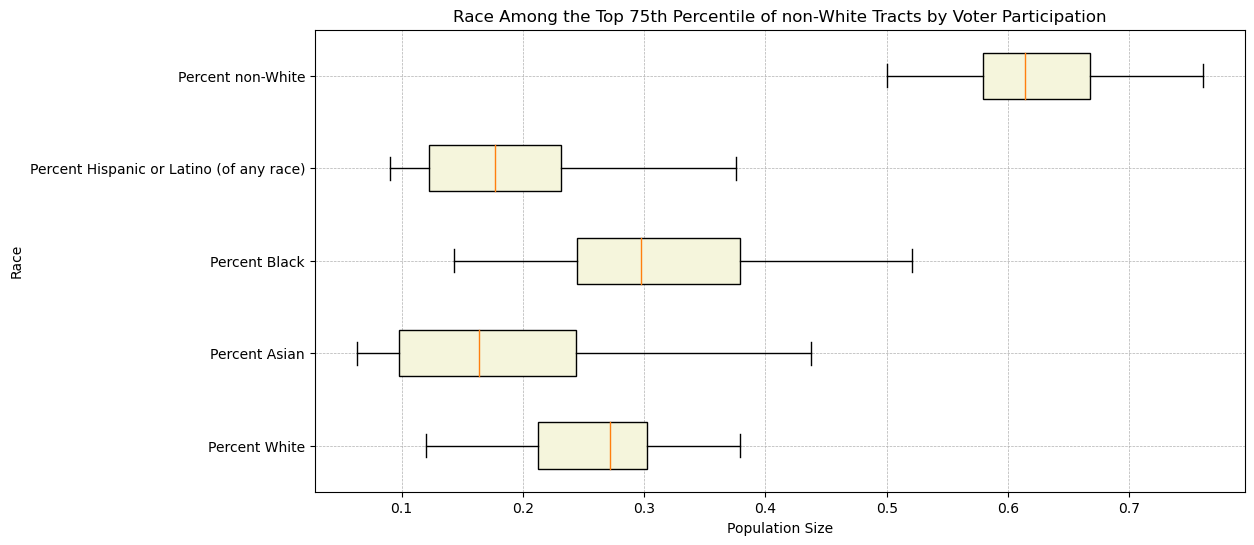

<Figure size 640x480 with 0 Axes>

In [454]:
columns_for_boxplot = [
    'Percent White',
    'Percent Asian',
    'Percent Black',
    'Percent Hispanic or Latino (of any race)',
    'Percent non-White'
]
labels=[
    'Percent White',
    'Percent Asian',
    'Percent Black',
    'Percent Hispanic or Latino (of any race)',
    'Percent non-White'
]
# Select the relevant rows (statistics) for the columns to include in the boxplots
boxplot_data = highest_propensity_tracts_nw.loc[['mean', '25%', '50%', '75%', 'min', 'max'], columns_for_boxplot]
# Transpose the data to have variables as rows and statistics as columns
boxplot_data = boxplot_data.T
plt.figure(figsize=(12, 6))
boxplot = plt.boxplot(boxplot_data.values.T, vert=False, labels=labels, patch_artist=True, boxprops=dict(facecolor='beige'))
plt.xlabel('Population Size')
plt.ylabel('Race')
plt.title('Race Among the Top 75th Percentile of non-White Tracts by Voter Participation')
plt.grid(True, axis='both', linestyle='--', linewidth=0.5)
plt.show()
plt.savefig('Race Among the Top 75th Percentile of non-White Tracts by Voter Participation.png', dpi=300, bbox_inches='tight')

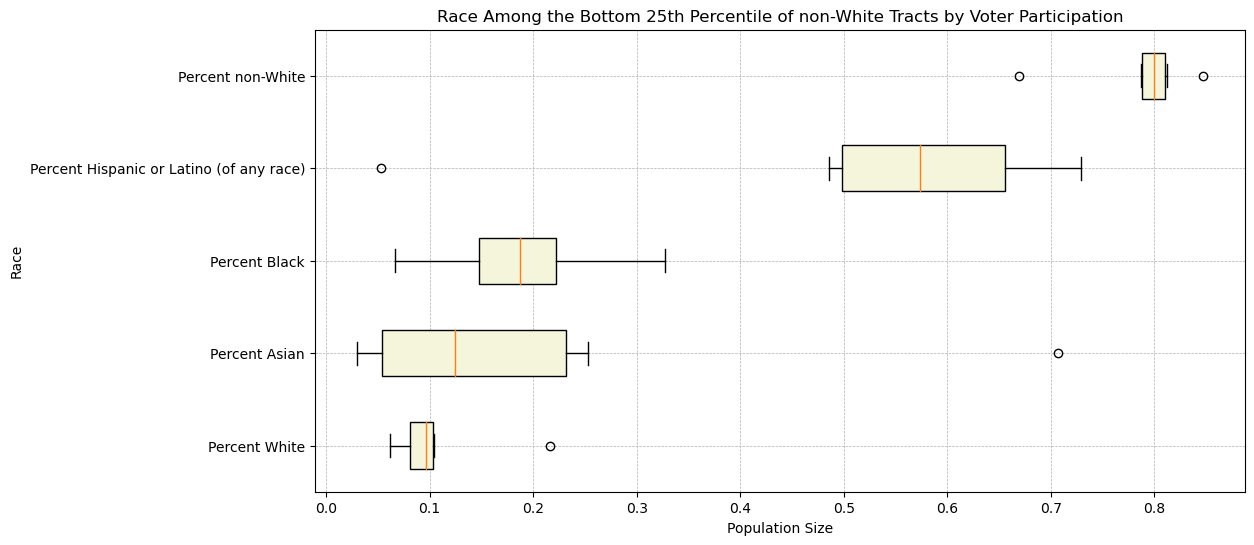

<Figure size 640x480 with 0 Axes>

In [455]:
columns_for_boxplot = [
    'Percent White',
    'Percent Asian',
    'Percent Black',
    'Percent Hispanic or Latino (of any race)',
    'Percent non-White'
]
labels=[
    'Percent White',
    'Percent Asian',
    'Percent Black',
    'Percent Hispanic or Latino (of any race)',
    'Percent non-White'
]
# Select the relevant rows (statistics) for the columns to include in the boxplots
boxplot_data = lowest_propensity_tracts_nw.loc[['mean', '25%', '50%', '75%', 'min', 'max'], columns_for_boxplot]
# Transpose the data to have variables as rows and statistics as columns
boxplot_data = boxplot_data.T
plt.figure(figsize=(12, 6))
boxplot = plt.boxplot(boxplot_data.values.T, vert=False, labels=labels, patch_artist=True, boxprops=dict(facecolor='beige'))
plt.xlabel('Population Size')
plt.ylabel('Race')
plt.title('Race Among the Bottom 25th Percentile of non-White Tracts by Voter Participation')
plt.grid(True, axis='both', linestyle='--', linewidth=0.5)
plt.show()
plt.savefig('Race Among the Bottom 25th Percentile of non-White Tracts by Voter Participation.png', dpi=300, bbox_inches='tight')

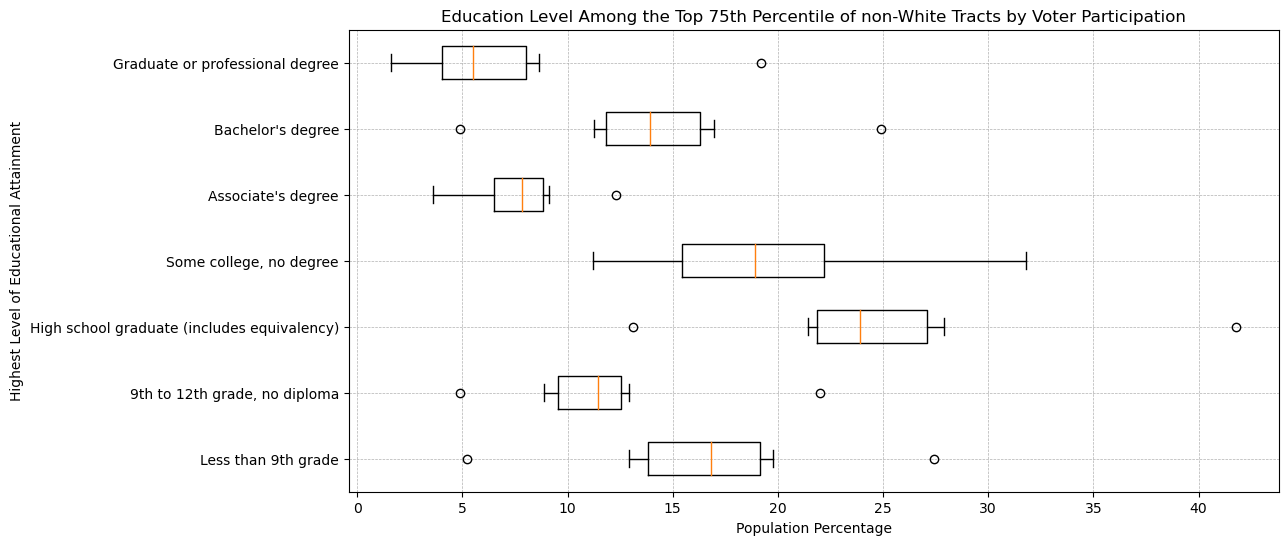

<Figure size 640x480 with 0 Axes>

In [456]:
columns_for_boxplot2=[
"Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade",
'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma',
'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)',
"Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree",
"Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree",
"Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree",
"Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree",
]
labels=[
    'Less than 9th grade',
    '9th to 12th grade, no diploma',
    'High school graduate (includes equivalency)',
    'Some college, no degree',
    "Associate's degree",
    "Bachelor's degree",
    "Graduate or professional degree",
]
# Select the relevant rows (statistics) for the columns to include in the boxplots
boxplot_data = highest_poverty_tracts_nw.loc[['mean', '25%', '50%', '75%', 'min', 'max'], columns_for_boxplot2]

# Transpose the data to have variables as rows and statistics as columns
boxplot_data = boxplot_data.T

# Create a boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(boxplot_data.values.T, vert=False, labels=labels)
plt.xlabel('Population Percentage')
plt.ylabel('Highest Level of Educational Attainment')
plt.title('Education Level Among the Top 75th Percentile of non-White Tracts by Voter Participation')
plt.grid(True, axis='both', linestyle='--', linewidth=0.5)
plt.show()
plt.savefig('Education Level Among the Top 75th Percentile of non-White Tracts by Voter Participation.png', dpi=300, bbox_inches='tight')

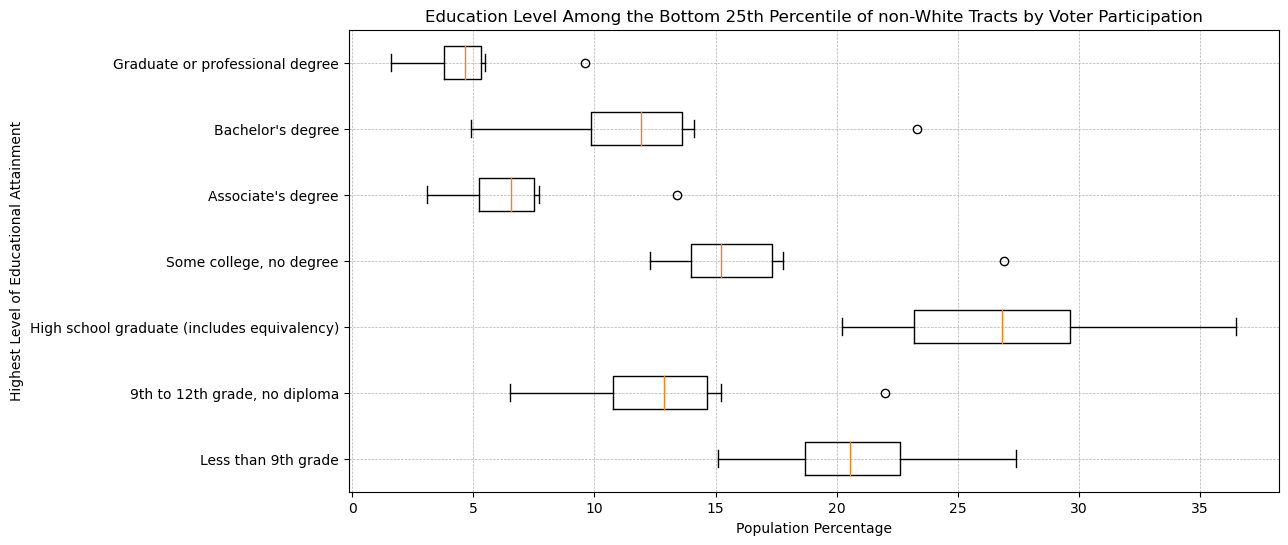

<Figure size 640x480 with 0 Axes>

In [457]:
columns_for_boxplot2=[
"Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade",
'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma',
'Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)',
"Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree",
"Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree",
"Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree",
"Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree",
]
labels=[
    'Less than 9th grade',
    '9th to 12th grade, no diploma',
    'High school graduate (includes equivalency)',
    'Some college, no degree',
    "Associate's degree",
    "Bachelor's degree",
    "Graduate or professional degree",
]
# Select the relevant rows (statistics) for the columns  to include in the boxplots
boxplot_data = lowest_propensity_tracts_nw.loc[['mean', '25%', '50%', '75%', 'min', 'max'], columns_for_boxplot2]

# Transpose the data to have variables as rows and statistics as columns
boxplot_data = boxplot_data.T

# Create a boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(boxplot_data.values.T, vert=False, labels=labels)
plt.xlabel('Population Percentage')
plt.ylabel('Highest Level of Educational Attainment')
plt.title('Education Level Among the Bottom 25th Percentile of non-White Tracts by Voter Participation')
plt.grid(True, axis='both', linestyle='--', linewidth=0.5)
plt.show()
plt.savefig('Education Level Among the Bottom 25th Percentile of non-White Tracts by Voter Participation.png', dpi=300, bbox_inches='tight')

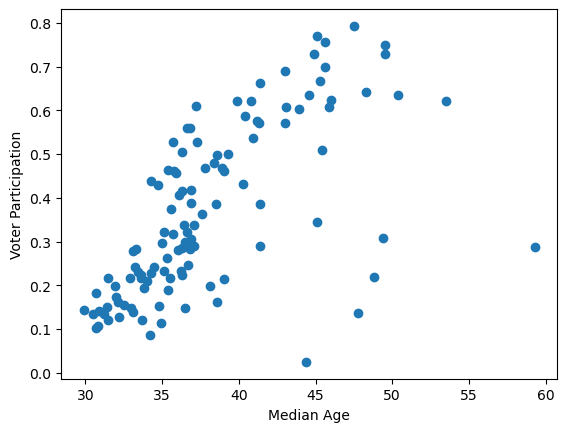

<Figure size 640x480 with 0 Axes>

In [468]:
#age and voter participation 1 Scatter plot
plt.scatter(full_df['Both sexes'], full_df['Participation in the last election of all voting age individuals'])
plt.xlabel('Median Age')
plt.ylabel('Voter Participation')
plt.show()
plt.savefig('Voter Participation by Median Age.png', dpi=300, bbox_inches='tight')

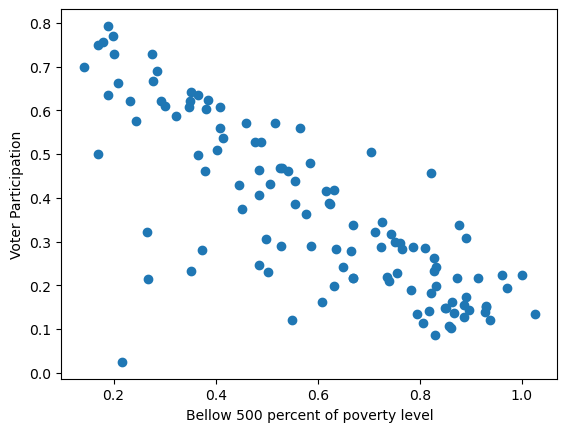

<Figure size 640x480 with 0 Axes>

In [469]:
# Socio economic status and Voter Participation 1 Scatter plot
plt.scatter(full_df['Estimate!!Total!!Population for whom poverty status is determined!!ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS!!500 percent of poverty level']/full_df['Total population'], full_df['Participation in the last election of all voting age individuals'])
plt.xlabel('Bellow 500 percent of poverty level')
plt.ylabel('Voter Participation')
plt.show()
plt.savefig('Participation by poverty rate individuals.png', dpi=300, bbox_inches='tight')

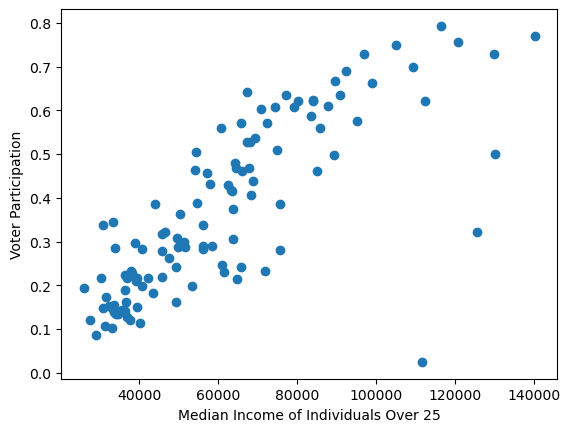

<Figure size 640x480 with 0 Axes>

In [470]:
# Scatter plot
plt.scatter(full_df['Estimate!!Total!!MEDIAN EARNINGS IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!Population 25 years and over with earnings'], full_df['Participation in the last election of all voting age individuals'])
plt.xlabel('Median Income of Individuals Over 25')
plt.ylabel('Voter Participation')
plt.show()
plt.savefig('Participation by Median Income of Individuals Over 25.png', dpi=300, bbox_inches='tight')